In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))


In [2]:
from utils import load_dataset

In [3]:
nexmark_dataset = load_dataset.load_nexmark_data_queries()

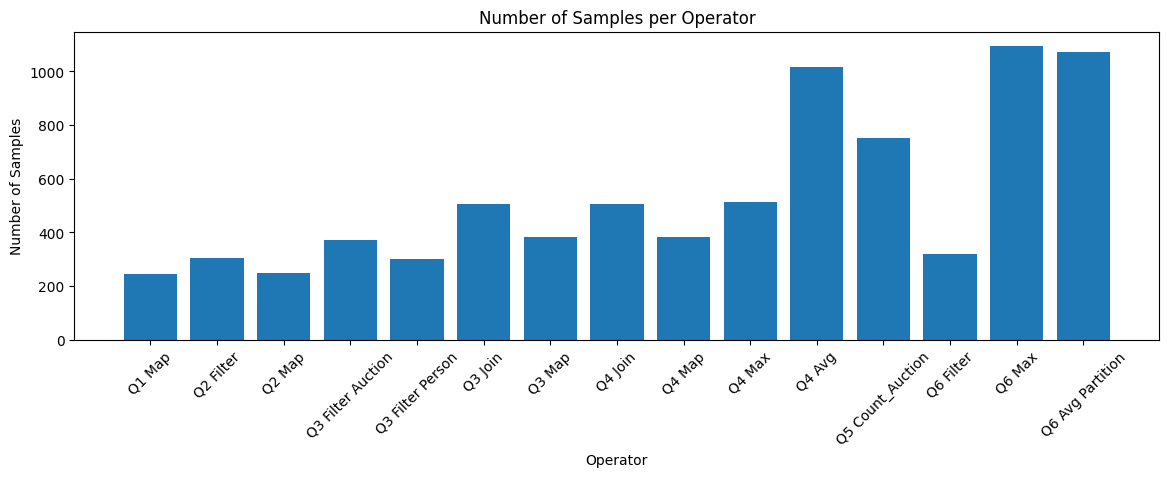

{'Q1 Map': 245, 'Q2 Filter': 303, 'Q2 Map': 249, 'Q3 Filter Auction': 372, 'Q3 Filter Person': 300, 'Q3 Join': 504, 'Q3 Map': 384, 'Q4 Join': 505, 'Q4 Map': 384, 'Q4 Max': 512, 'Q4 Avg': 1018, 'Q5 Count_Auction': 750, 'Q6 Filter': 320, 'Q6 Max': 1094, 'Q6 Avg Partition': 1071}


In [4]:
# Count the number of samples per operator
operator_counts = {operator: len(nexmark_dataset[operator]['files']) for operator in nexmark_dataset}

# Plot the data
plt.figure(figsize=(14, 4))
plt.bar(operator_counts.keys(), operator_counts.values())
plt.xlabel('Operator')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Operator')
plt.xticks(rotation=45)
plt.show()

print(operator_counts)

In [5]:
def load_files(files, num_samples=None, max_len=None, random_sample=False):
    data_arr = []
    if num_samples is not None:
        if random_sample:
            files = np.random.choice(files, num_samples, replace=False)
        else:
            files = files[:num_samples]
    
    for filepath in files:
        df = pd.read_csv(filepath)
        x = df['time'].astype(np.float32).values

        start = 0.05 * len(x)
        end = 0.95 * len(x)
        x = x[int(start):int(end)]

        if max_len is not None:
            if len(x) > max_len:
                x = x[:max_len]
            if len(x) < max_len:
                x = np.pad(x, (0, max_len - len(x)), 'constant', constant_values=(0))

        # x = np.expand_dims(x, axis=1)

        data_arr.append(x)
    
    return files, data_arr

In [9]:
for operator in nexmark_dataset:
    files = nexmark_dataset[operator]['files']
    chosen_files, data_arr = load_files(files, num_samples=50, random_sample=True)
    nexmark_dataset[operator]['chosen_files'] = chosen_files
    nexmark_dataset[operator]['data'] = data_arr
    print(f"Operator: {operator}, Shape: {len(data_arr)}")

Operator: Q1 Map, Shape: 50
Operator: Q2 Filter, Shape: 50
Operator: Q2 Map, Shape: 50
Operator: Q3 Filter Auction, Shape: 50
Operator: Q3 Filter Person, Shape: 50
Operator: Q3 Join, Shape: 50
Operator: Q3 Map, Shape: 50
Operator: Q4 Join, Shape: 50
Operator: Q4 Map, Shape: 50
Operator: Q4 Max, Shape: 50
Operator: Q4 Avg, Shape: 50
Operator: Q5 Count_Auction, Shape: 50
Operator: Q6 Filter, Shape: 50
Operator: Q6 Max, Shape: 50
Operator: Q6 Avg Partition, Shape: 50


In [10]:
def plot_original_data(data, operator_name=None):
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 3, 1)
    plt.plot(data)
    if operator_name:
        plt.title(f'Original Time Series for {operator_name}')
    else:
        plt.title('Original Time Series')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [13]:
def empirical_cdf(data):
    """Compute the empirical CDF of the data."""
    sorted_data = np.sort(data)
    yvals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, yvals

def plot_empirical_cdf(data_arr, operator_name=None):
    """Plot the empirical CDF of the data."""
    plt.figure(figsize=(8, 6))

    for data in data_arr:
        sorted_data, yvals = empirical_cdf(data)
        # find index of the first value greater than 0.99
        index = np.argmax(yvals > 0.998)
        # truncate the data
        sorted_data = sorted_data[:index]
        yvals = yvals[:index]
        
        plt.plot(sorted_data, yvals, linewidth=10)
        
    # if operator_name:
    #     plt.title(f'CDF for {operator_name}')
    # else:
    #     plt.title('Empirical CDF')
    plt.xlabel('Time (log)', fontsize=24)
    plt.ylabel('Cumulative Probability', fontsize=24)
    # plt.xticks([0, 50000, 150000, 250000], fontsize=22)
    plt.xscale('log')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)

    # from matplotlib.ticker import ScalarFormatter

    # ax = plt.gca()
    # ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    # ax.xaxis.get_offset_text().set_fontsize(24)

    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"nexmark_cdf_{operator_name}.pdf" if operator_name else "nexmark_cdf.pdf")
    plt.show()

Q1 Map


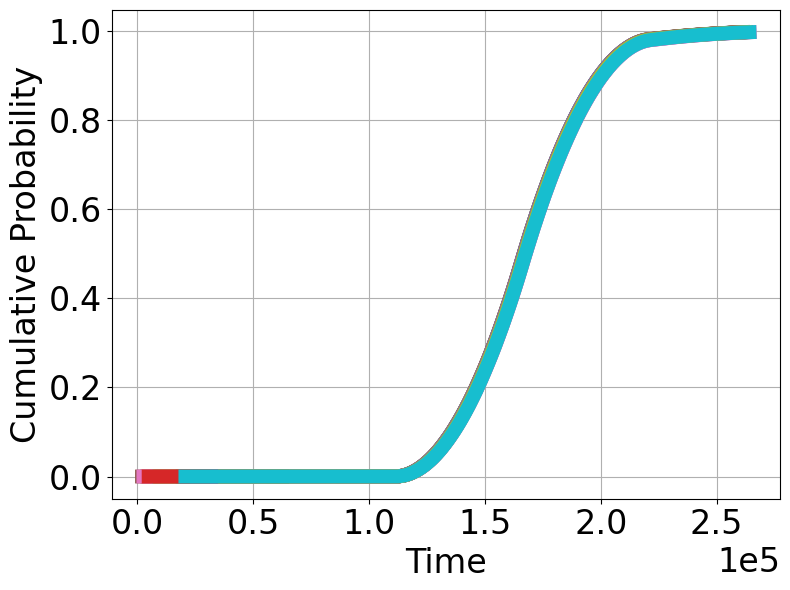

Q2 Filter


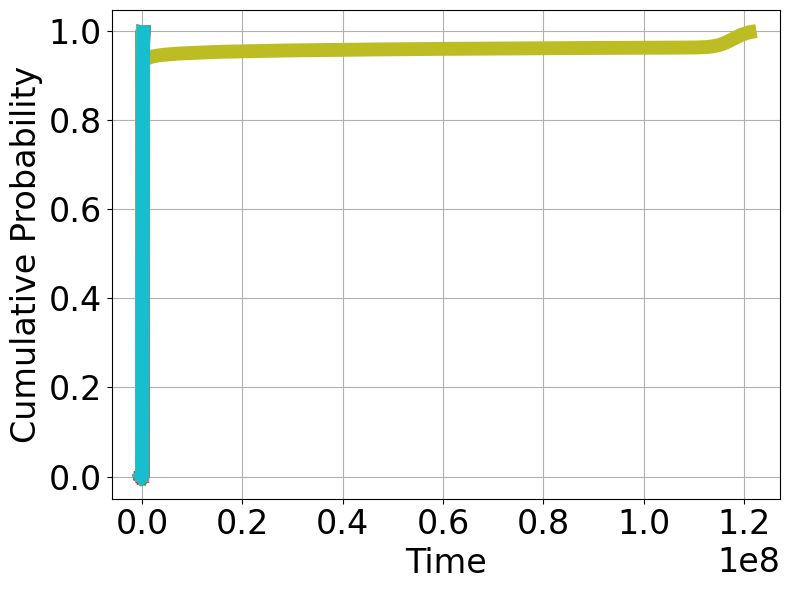

Q2 Map


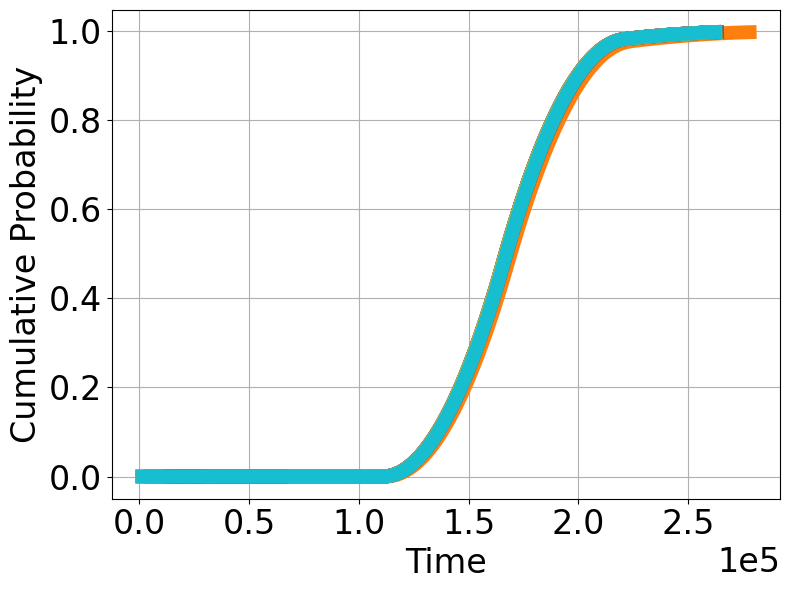

Q3 Filter Auction


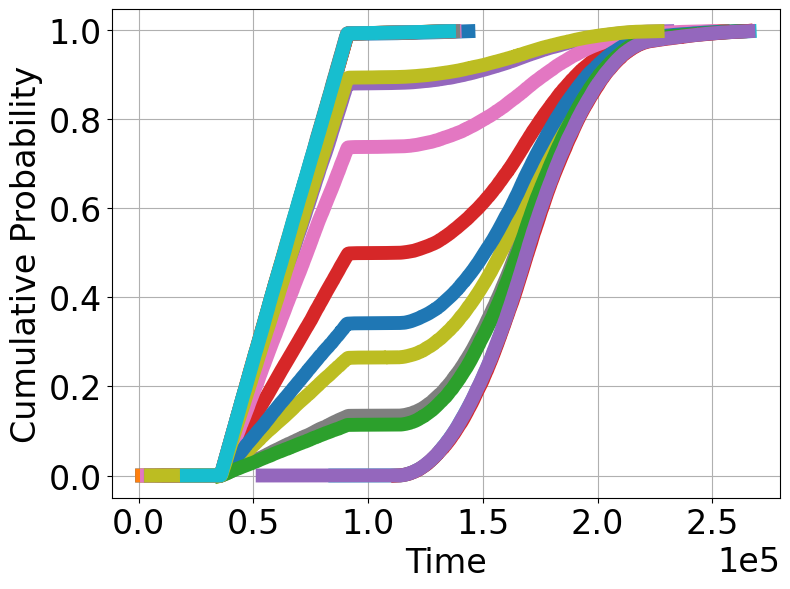

Q3 Filter Person


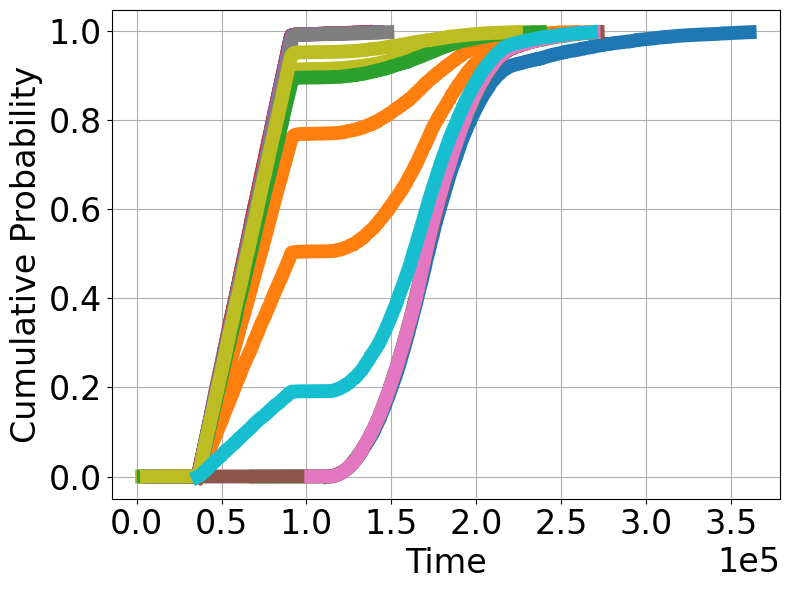

Q3 Join


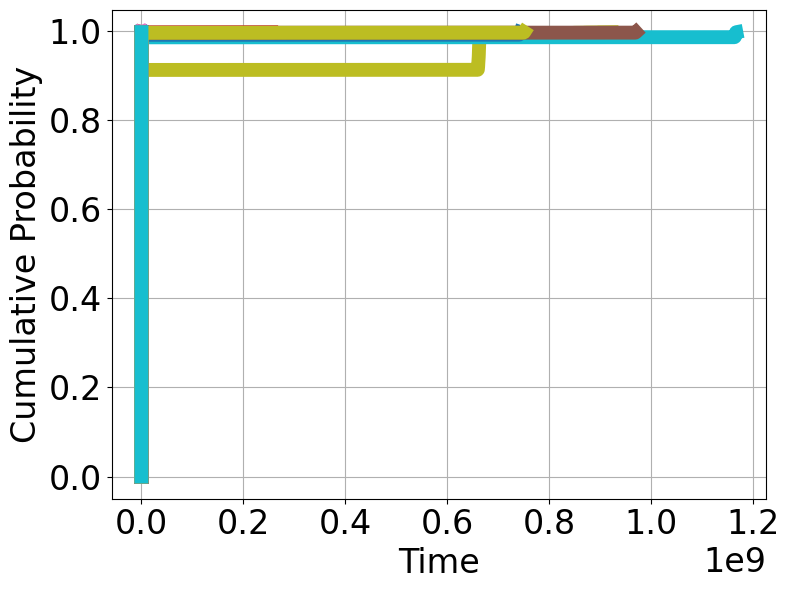

Q3 Map


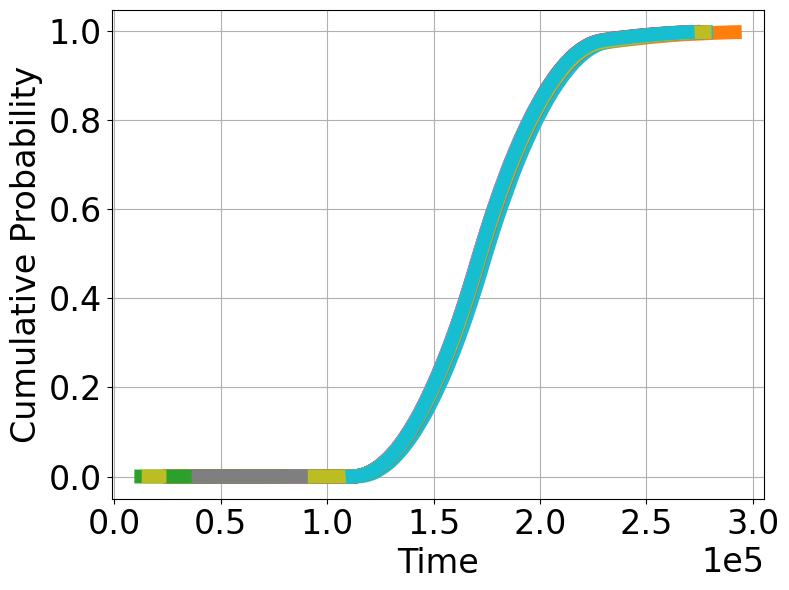

Q4 Join


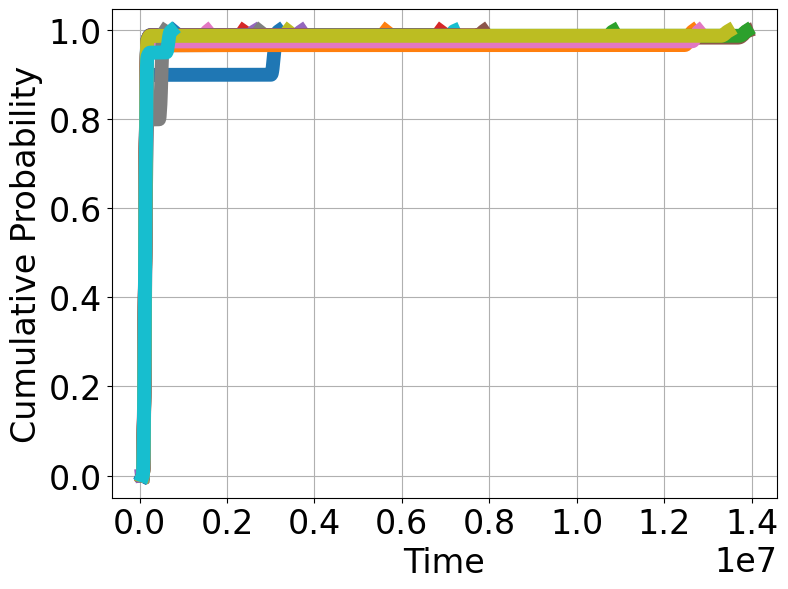

Q4 Map


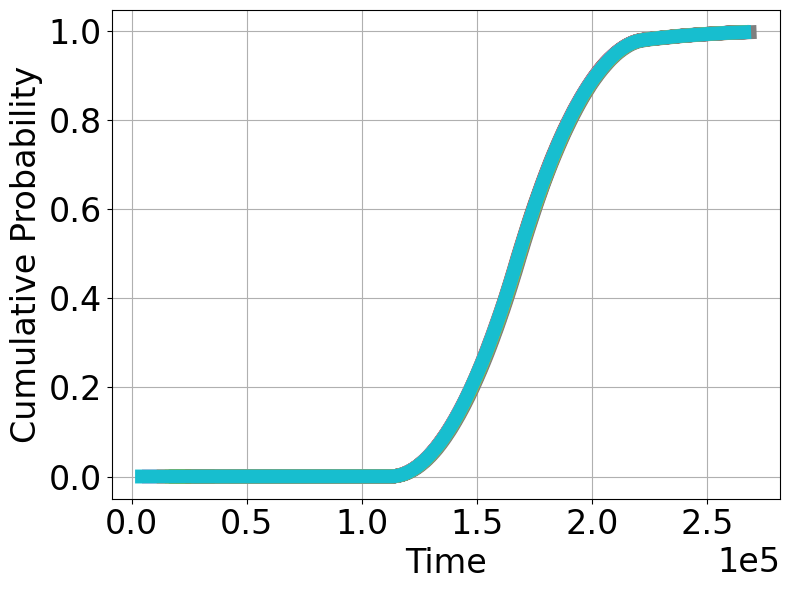

Q4 Max


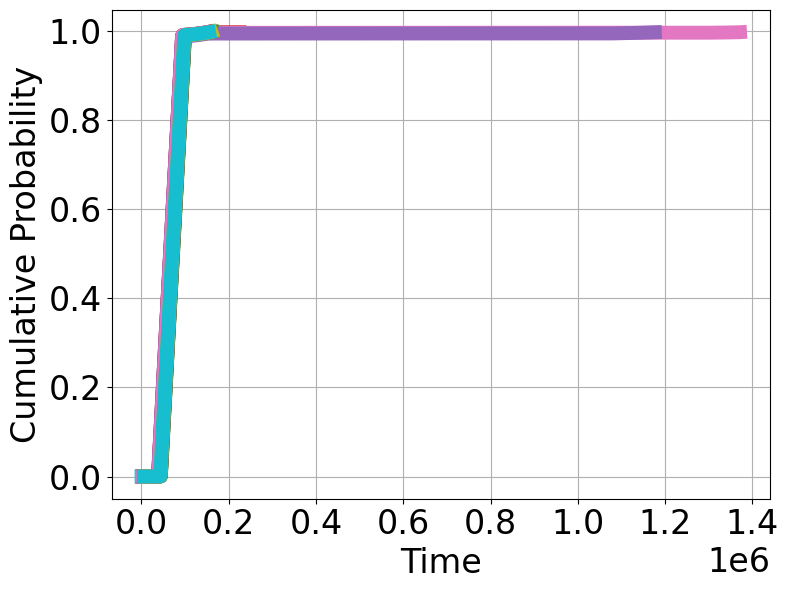

Q4 Avg


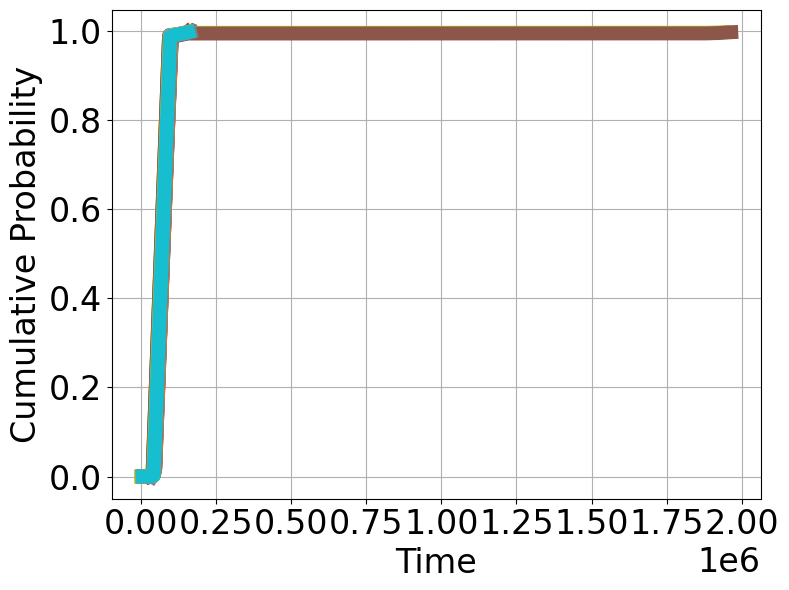

Q5 Count_Auction


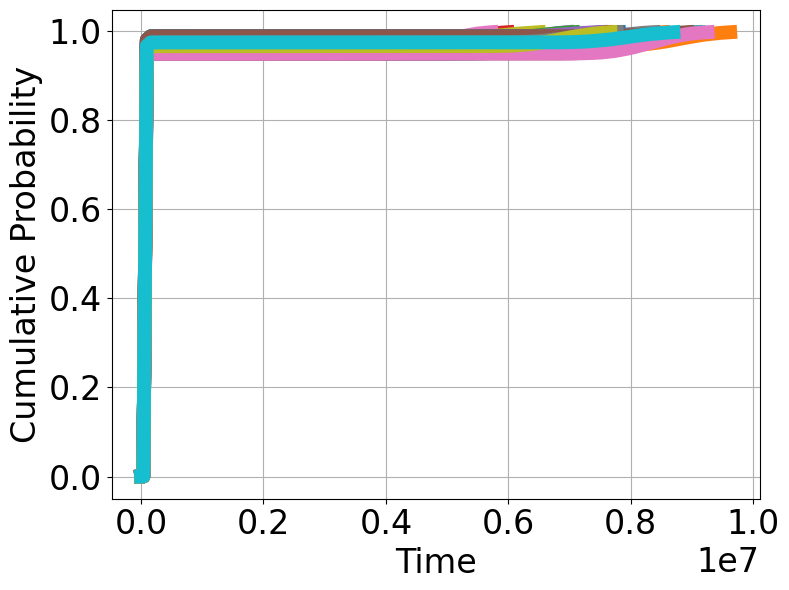

Q6 Filter


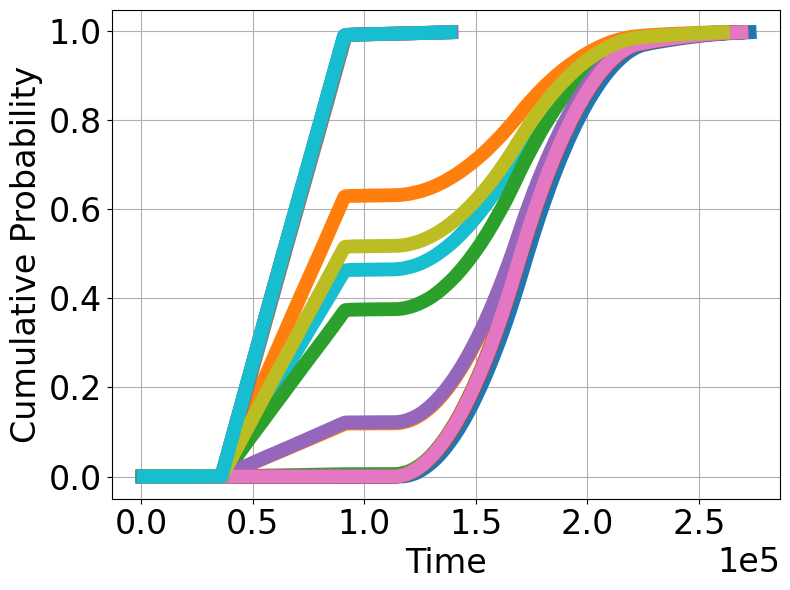

Q6 Max


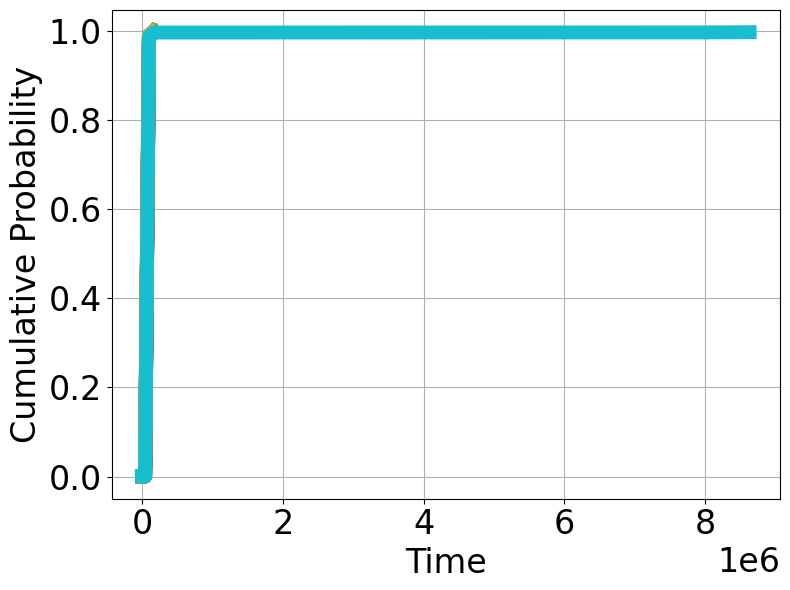

Q6 Avg Partition


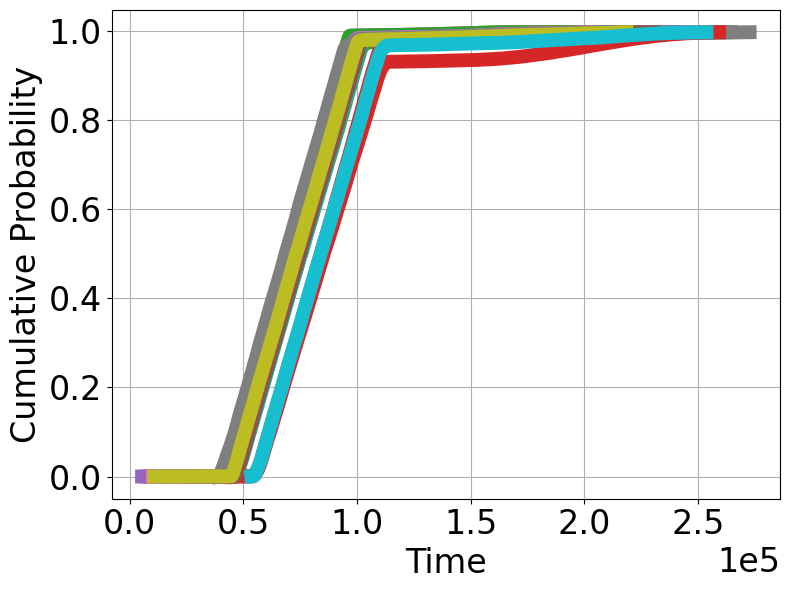

In [ ]:
for operator in nexmark_dataset:
    print(operator)
    data_arr = nexmark_dataset[operator]['data']
    plot_empirical_cdf(data_arr[:20], operator_name=operator)

    # break

q1 map: 49
q2 filter: 27

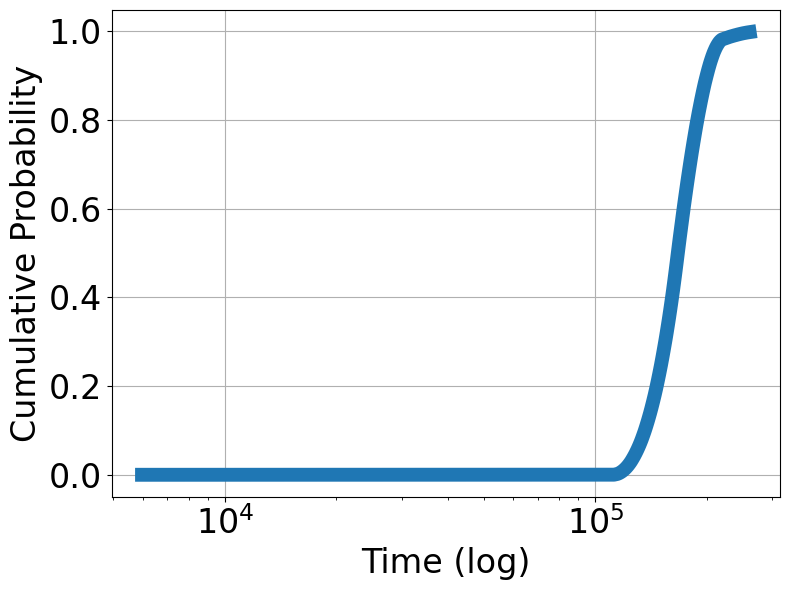

In [26]:
plot_empirical_cdf([nexmark_dataset['Q1 Map']['data'][49]], operator_name='Q1 Map')

47


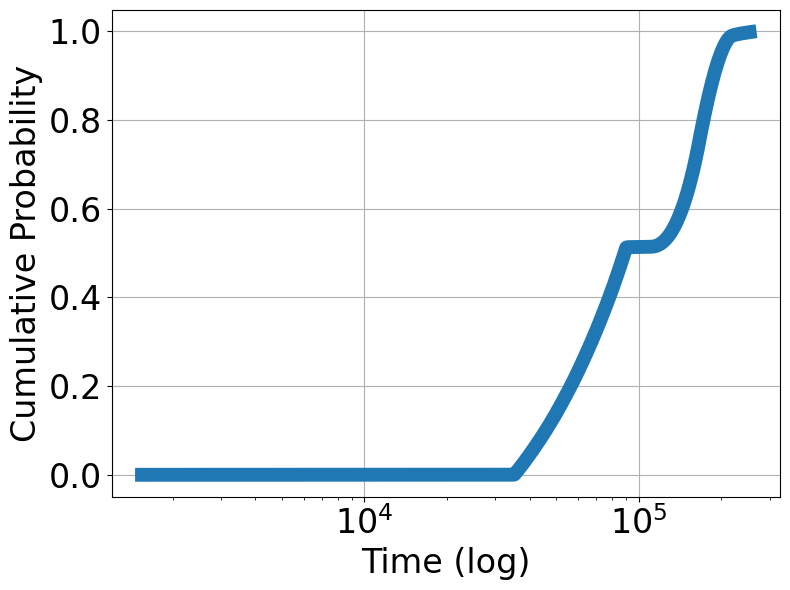

In [30]:
index = int(np.random.random() * 50)
print(index)
plot_empirical_cdf([nexmark_dataset['Q2 Filter']['data'][index]], operator_name='Q2 Filter')

34


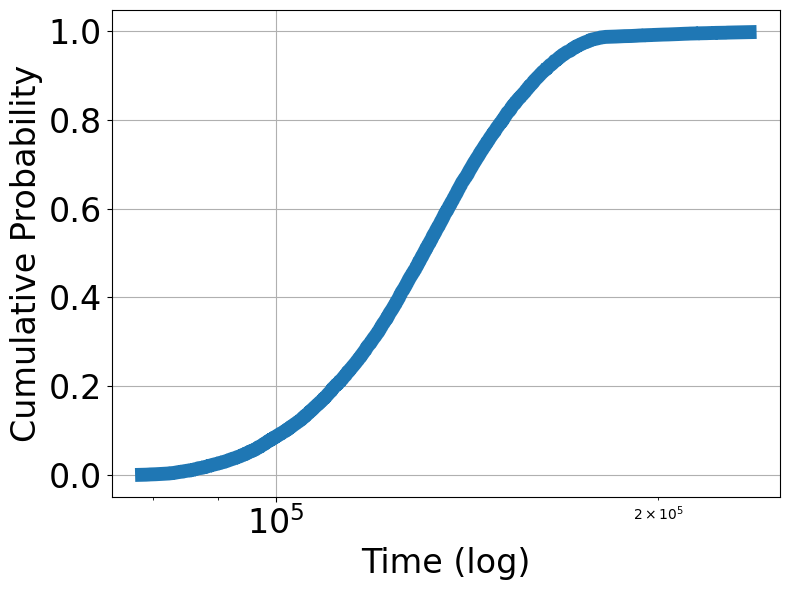

In [25]:
index = int(np.random.random() * 50)
print(index)
plot_empirical_cdf([nexmark_dataset['Q3 Join']['data'][index]], operator_name='Q3 Join')
# # 24

13


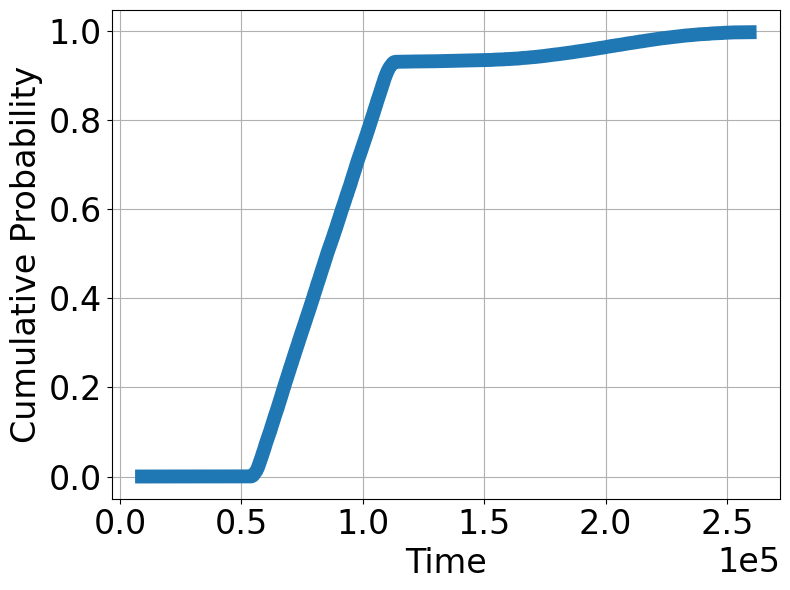

In [72]:
index = int(np.random.random() * 50)
print(index)
plot_empirical_cdf([nexmark_dataset['Q6 Avg Partition']['data'][index]], operator_name='Q6 Avg Partition')
# 24

5


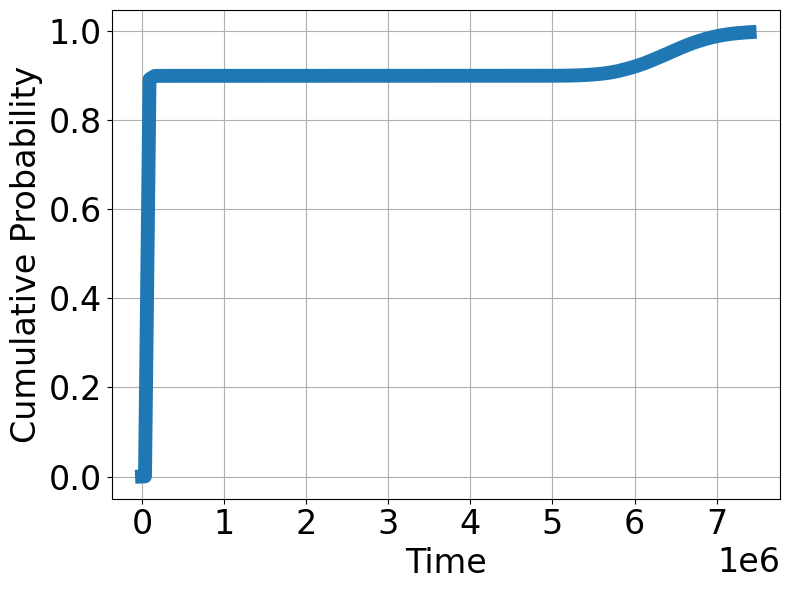

In [24]:
index = int(np.random.random() * 50)
print(index)
plot_empirical_cdf([nexmark_dataset['Q5 Count_Auction']['data'][35]], operator_name='Q5 Count_Auction')
# 24

11


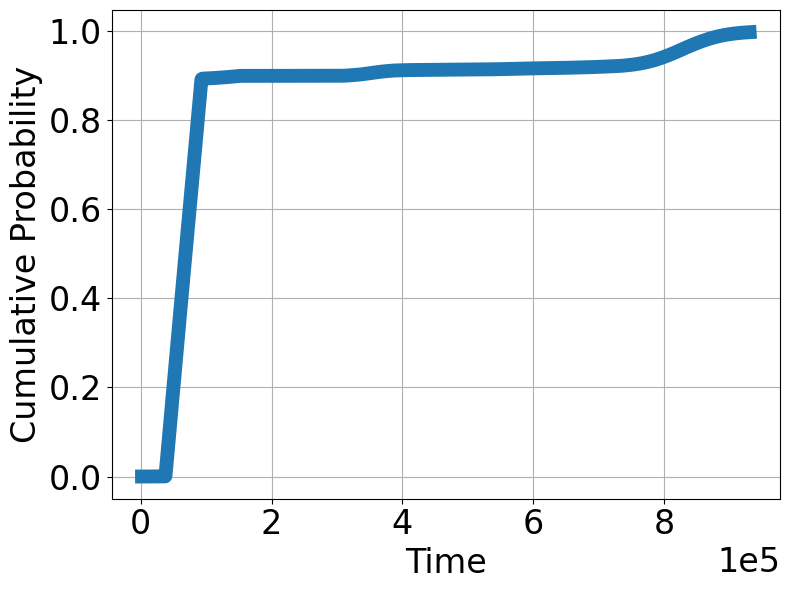

: 

In [ ]:
index = int(np.random.random() * 50)
print(index)
plot_empirical_cdf([nexmark_dataset['Q4 Max']['data'][23]], operator_name='Q4 Max')
# 24

Operator: Q1 Map, Index: 44, Data Length: 828000


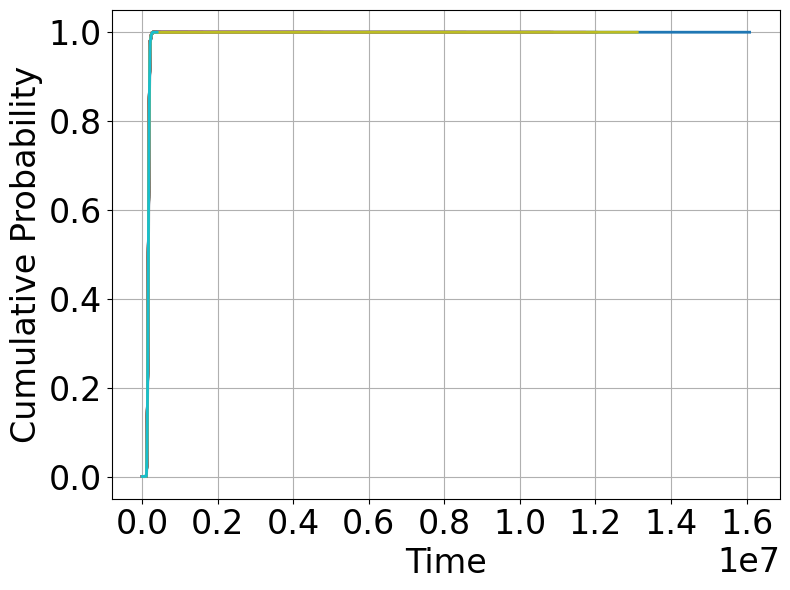

Operator: Q2 Filter, Index: 45, Data Length: 827991


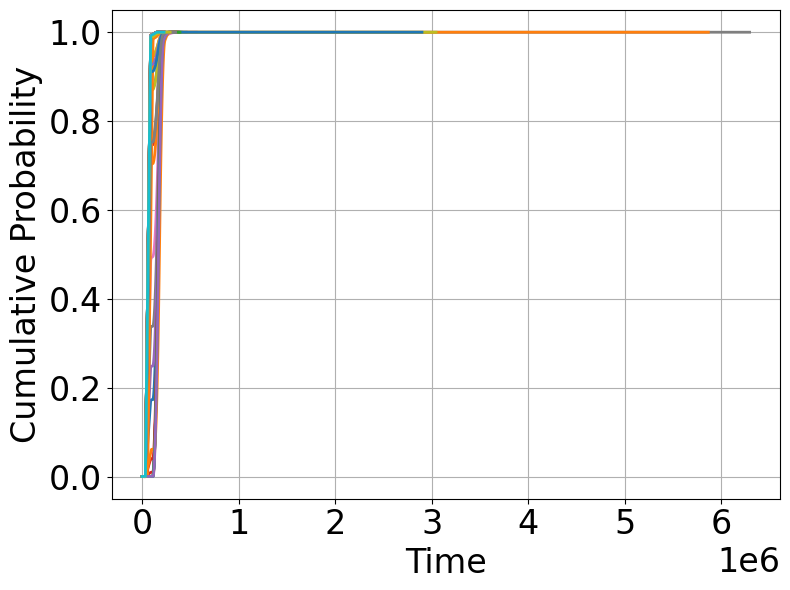

Operator: Q2 Map, Index: 29, Data Length: 828000


In [ ]:
for operator in nexmark_dataset:
    data_arr = nexmark_dataset[operator]['data']
    index = int(np.random.random() * len(data_arr))
    print(f"Operator: {operator}, Index: {index}, Data Length: {len(data_arr[index])}")
    # print(int(np.random.random() * len(data_arr)))
    plot_empirical_cdf(data_arr, operator_name=operator)
    # break

In [15]:
def cdf(data):
    mu, std = norm.fit(data)

    x_vals = np.linspace(min(data), max(data), 100)
    theoretical_cdf = norm.cdf(x_vals, loc=mu, scale=std)

    return x_vals, theoretical_cdf, mu, std

def plot_cdf(data_arr, operator_name=None):
    """Plot the CDF of the data."""
    plt.figure(figsize=(8, 4))
    for data in data_arr:
        x_vals, theoretical_cdf, mu, std = cdf(data)
        
        # find index of the first value greater than 0.99
        index = np.argmax(theoretical_cdf > 0.998)
        # truncate the data
        x_vals = x_vals[:index]
        theoretical_cdf = theoretical_cdf[:index]
        
        plt.plot(x_vals, theoretical_cdf, label='Theoretical CDF (Normal)')
        
    if operator_name:
        plt.title(f'Theoretical CDF for {operator_name}')
    else:
        plt.title(f'Theoretical CDF')
    plt.xlabel('Value')
    plt.ylabel('CDF')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

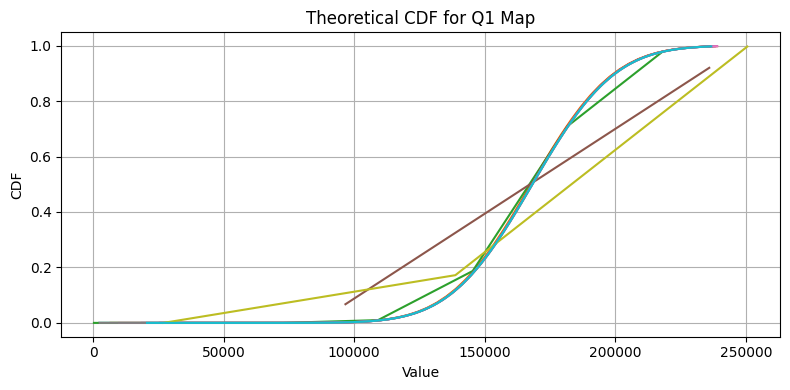

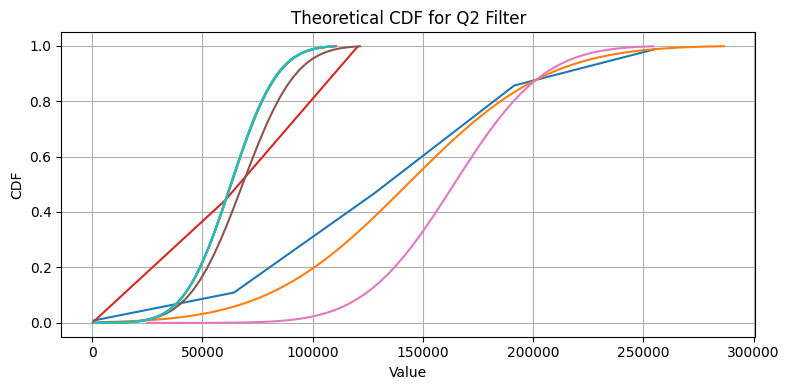

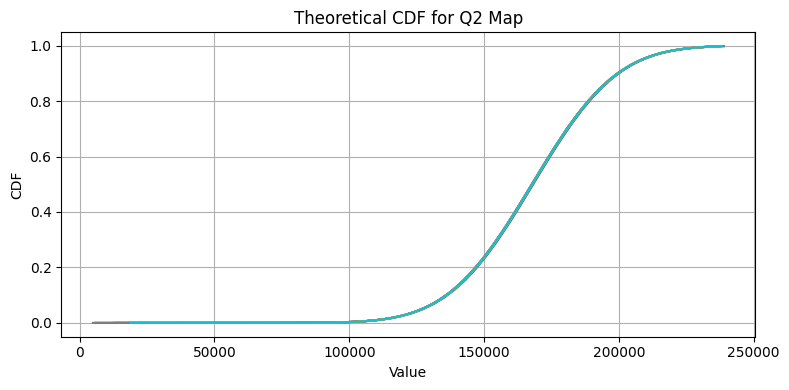

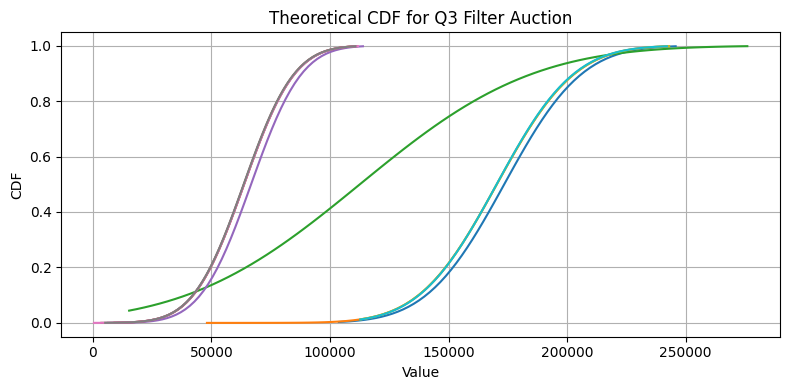

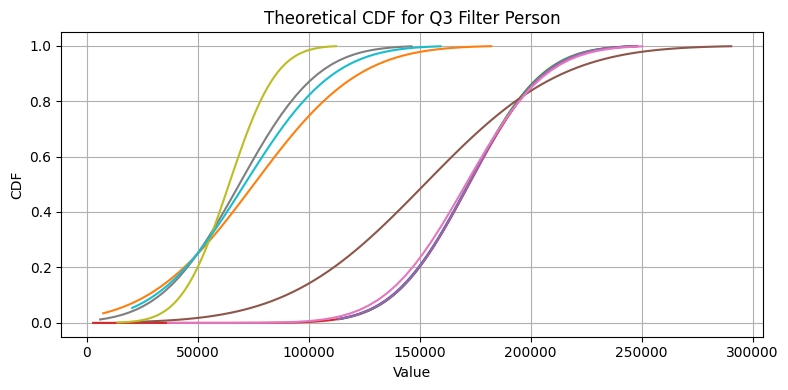

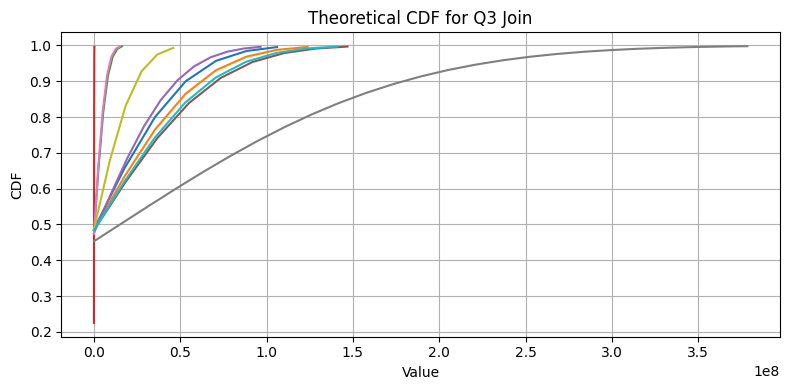

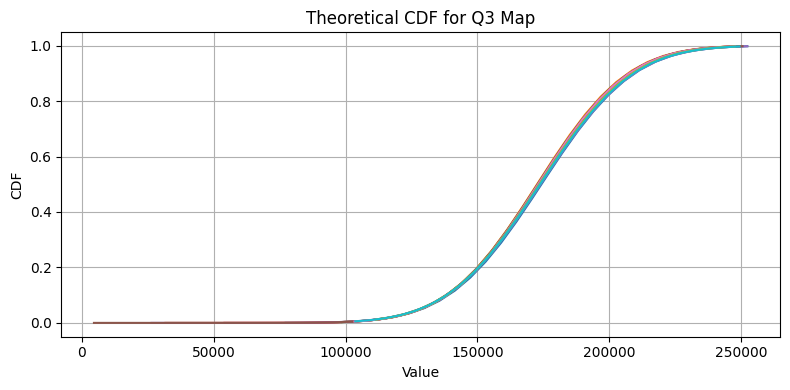

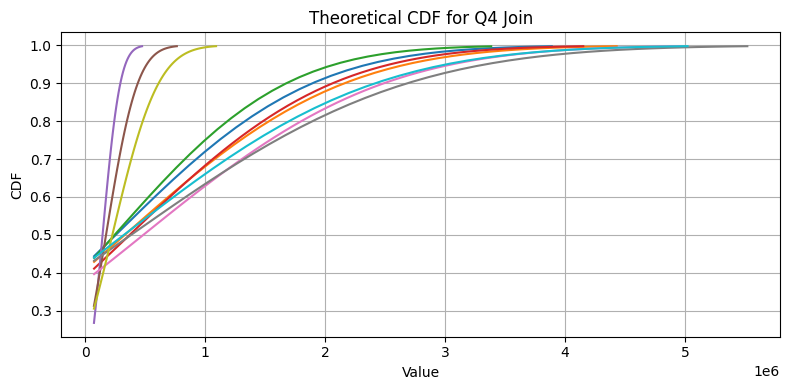

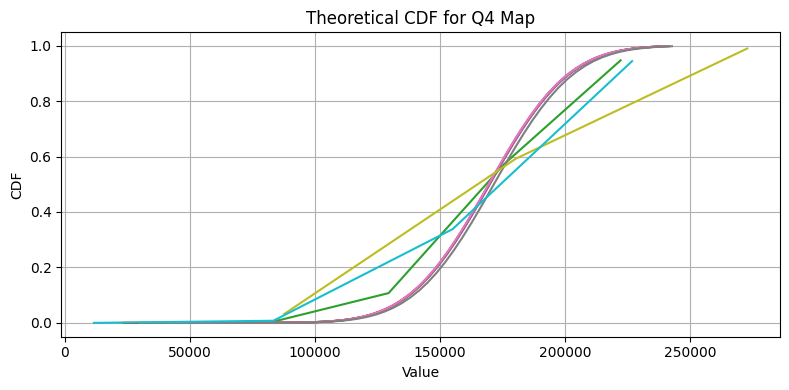

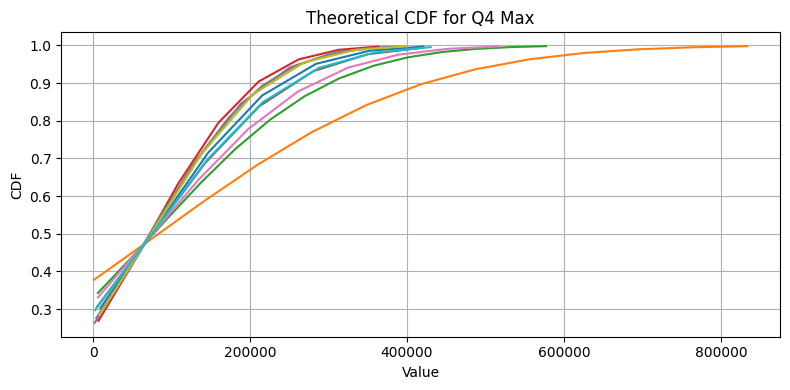

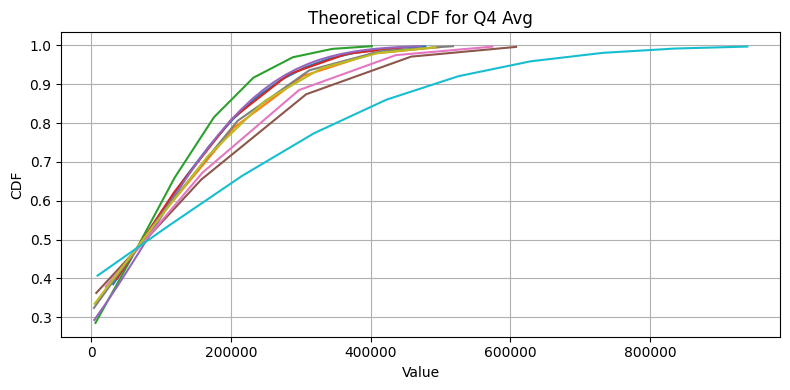

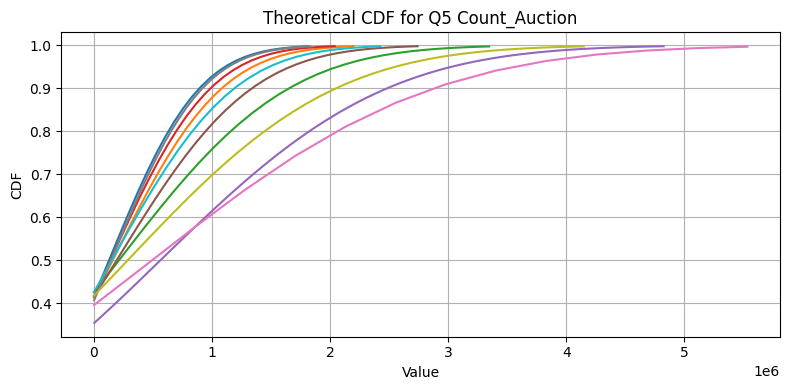

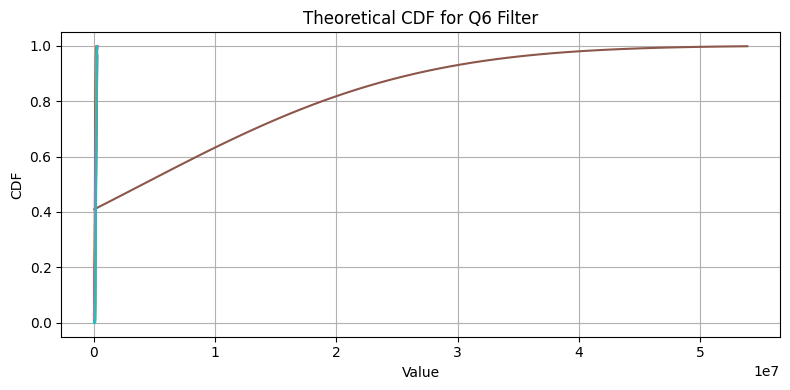

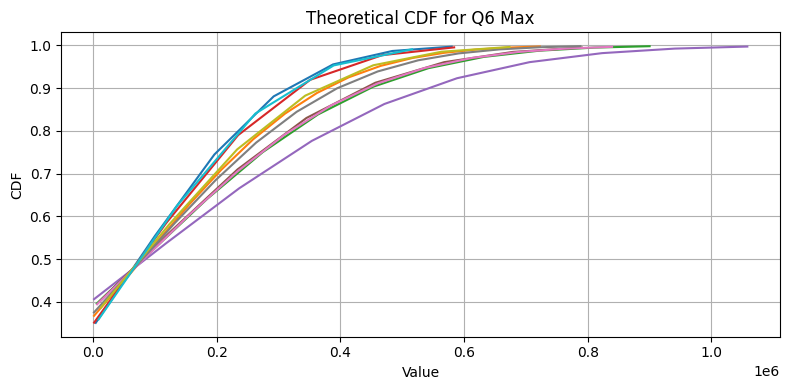

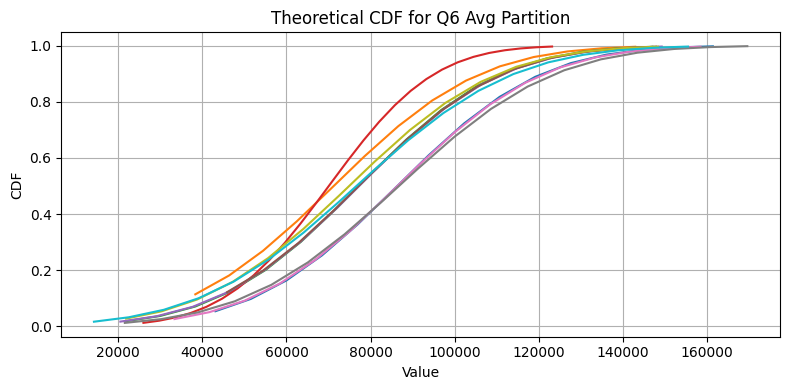

In [16]:
for operator in nexmark_dataset:
    data_arr = nexmark_dataset[operator]['data']
    plot_cdf(data_arr[:10], operator_name=operator)

In [22]:
def pdf(data):
    # Fit a normal distribution to the data
    mu, std = norm.fit(data)

    # Generate x values for plotting the PDF
    x_vals = np.linspace(min(data), max(data), 100)
    pdf_vals = norm.pdf(x_vals, loc=mu, scale=std)

    return x_vals, pdf_vals, mu, std

def plot_pdf(data_arr, operator_name=None):
    plt.figure(figsize=(14, 4))
    for data in data_arr:
        x_vals, theoretical_cdf, mu, std = pdf(data)
        
        # find index of the first value greater than 0.99
        # index = np.argmax(theoretical_cdf > 0.99)
        # truncate the data
        # x_vals = x_vals[:index]
        # theoretical_cdf = theoretical_cdf[:index]
        
        plt.plot(x_vals, theoretical_cdf, label='PDF (Normal)')
        
    if operator_name:
        plt.title(f'PDF for {operator_name}')
    else:
        plt.title(f'PDF')

    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

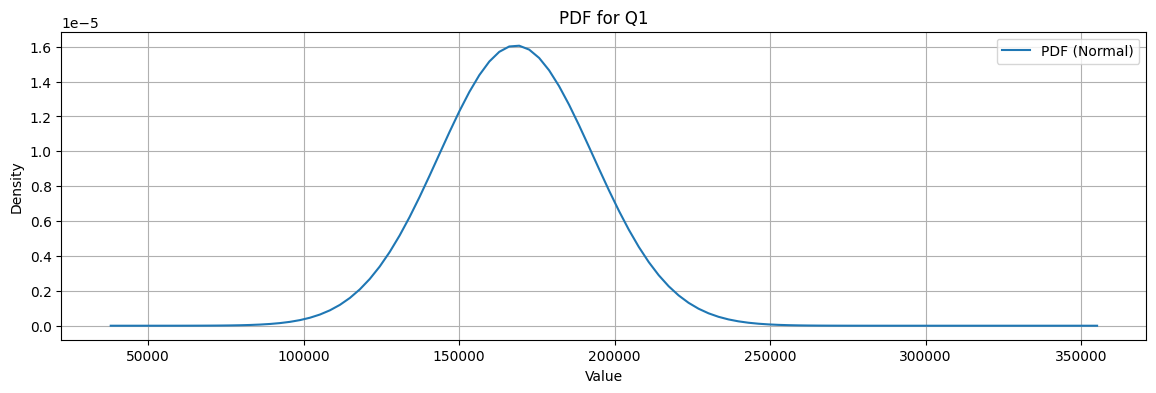

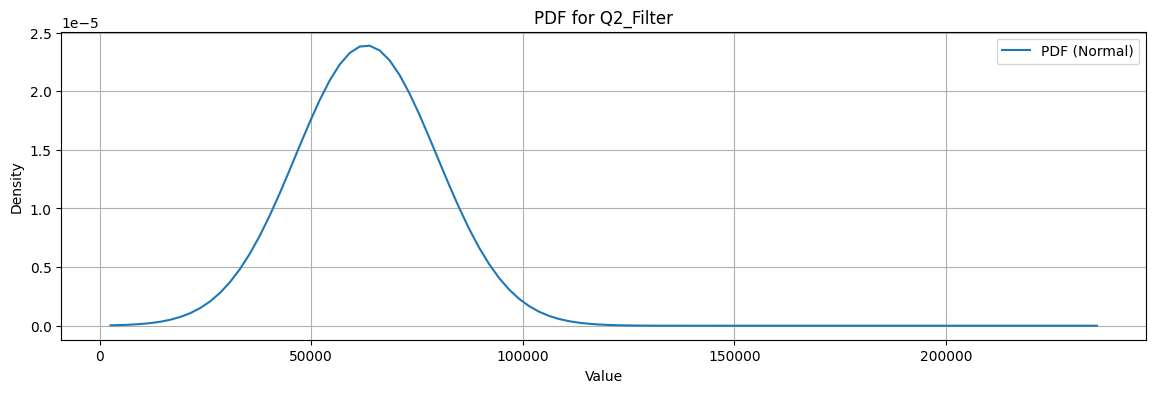

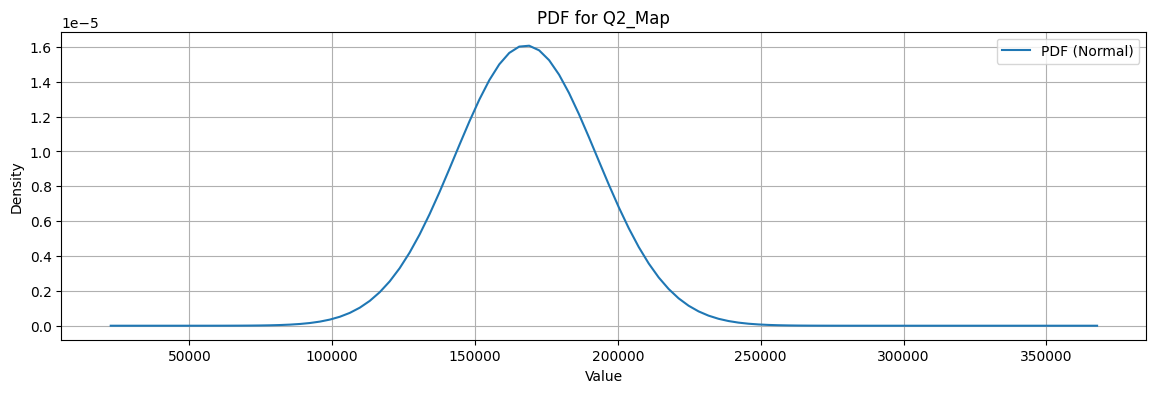

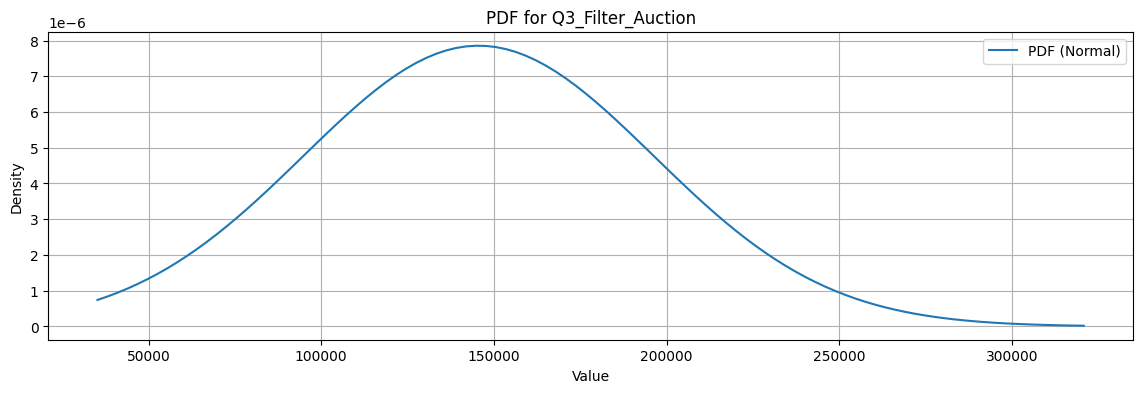

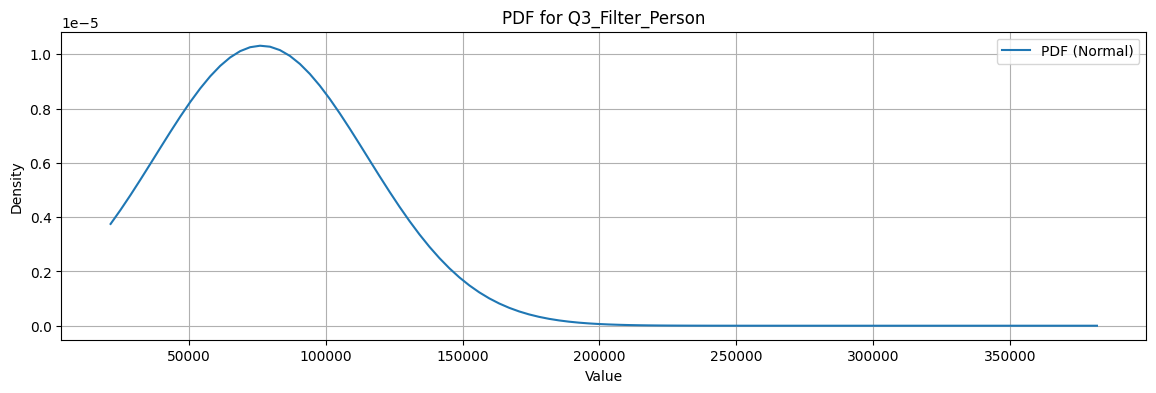

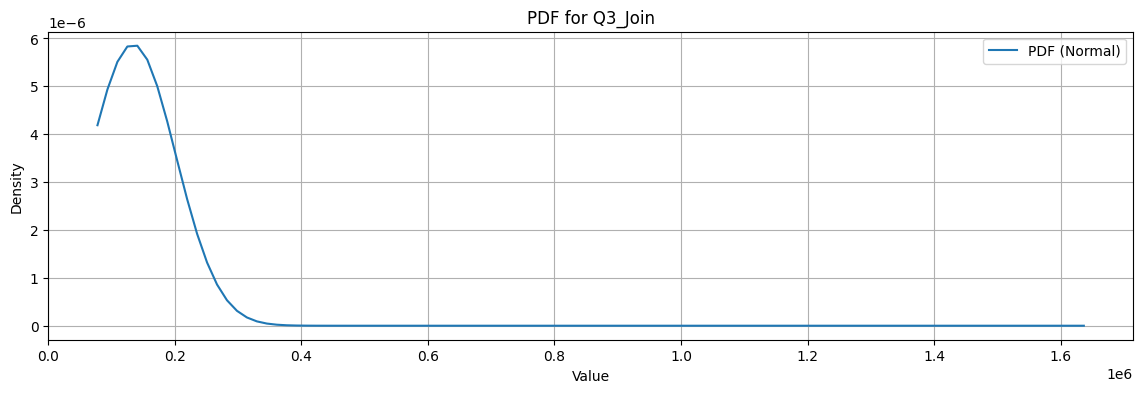

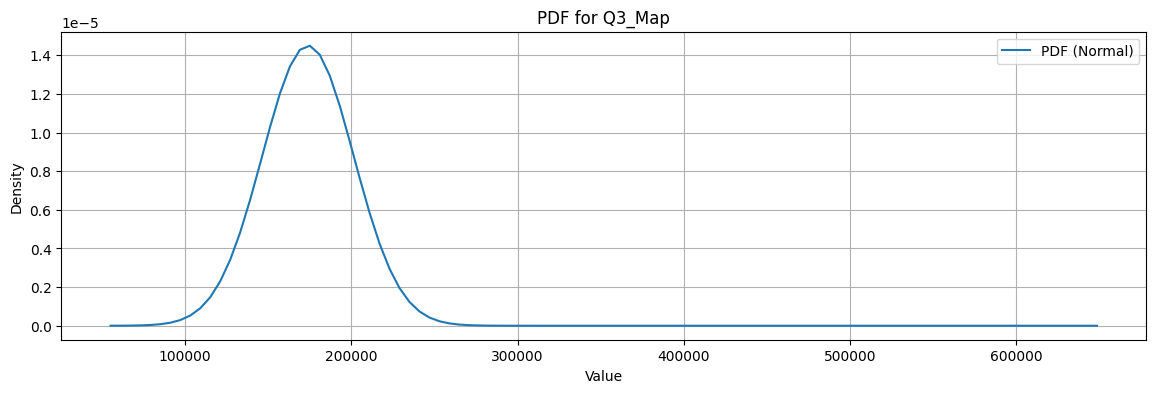

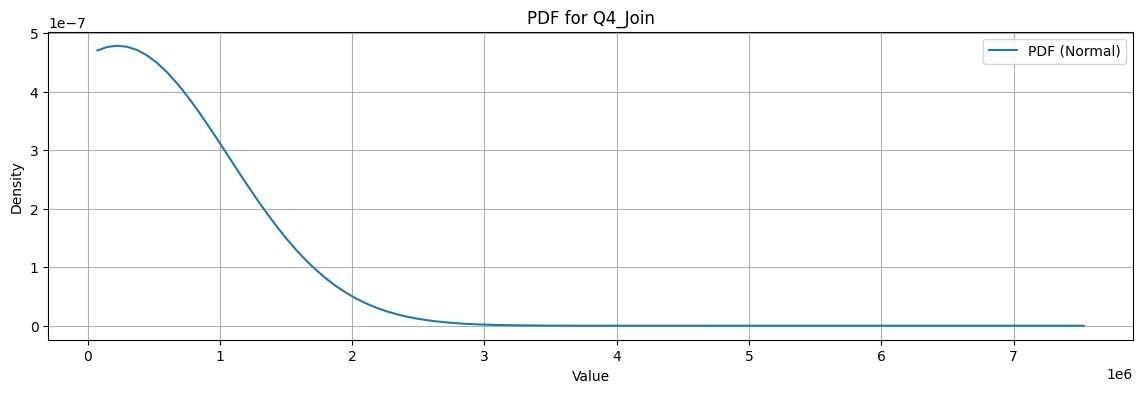

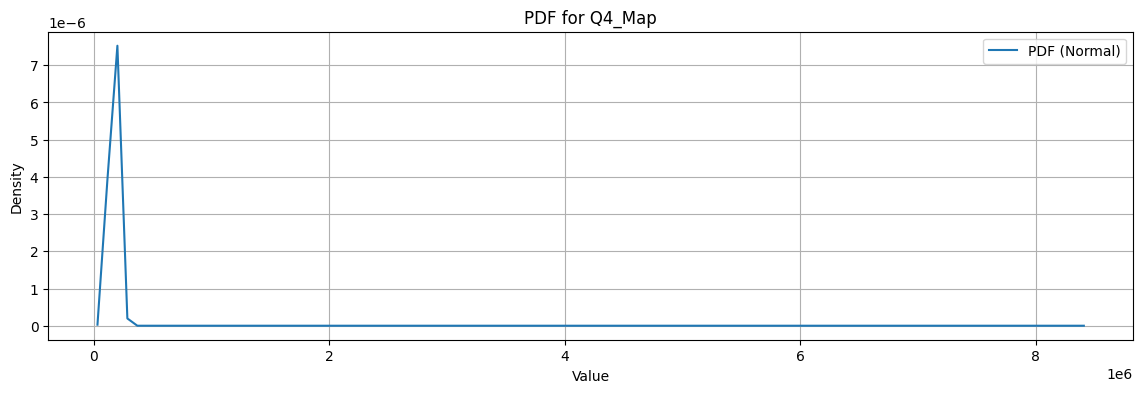

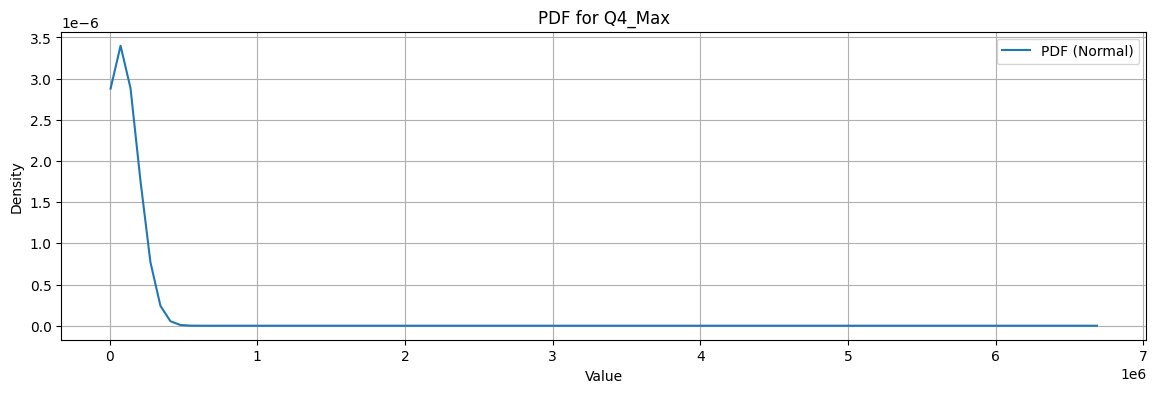

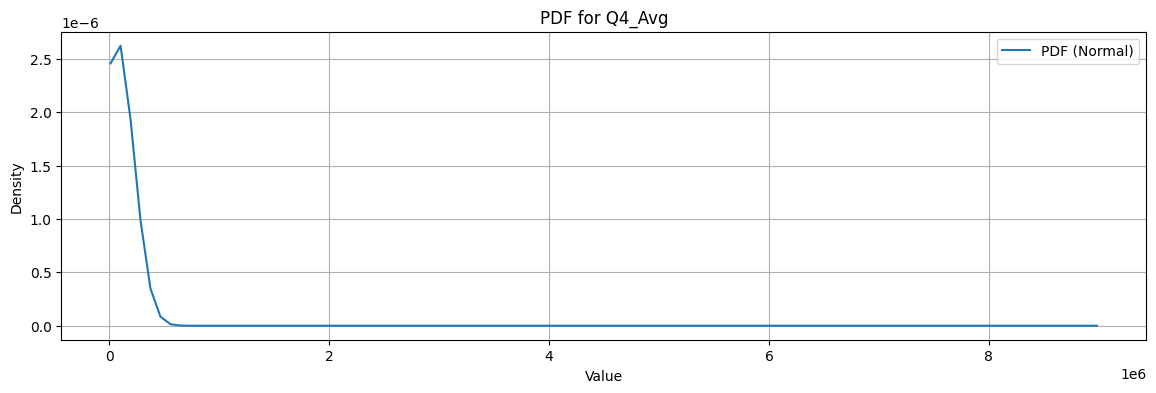

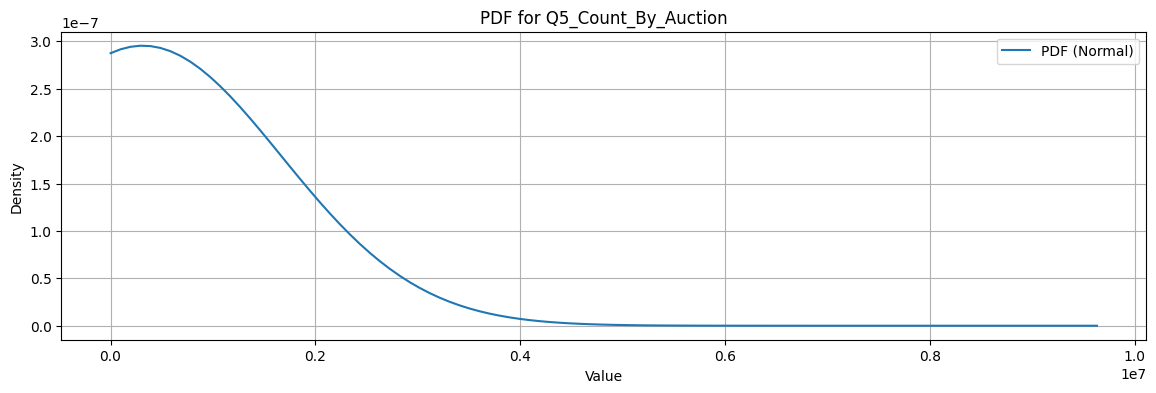

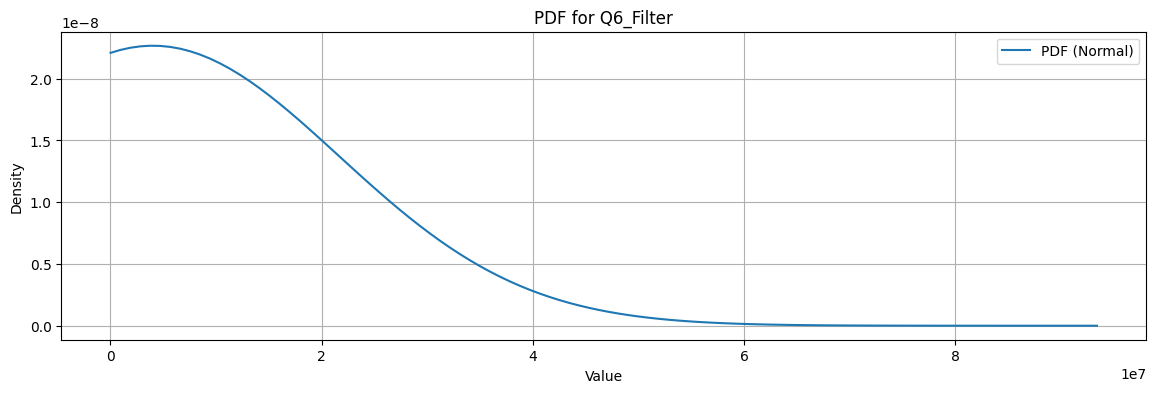

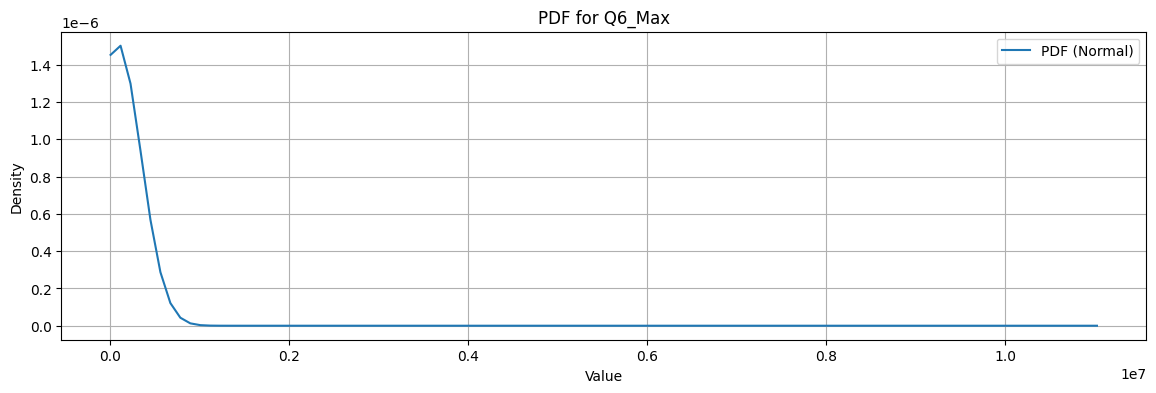

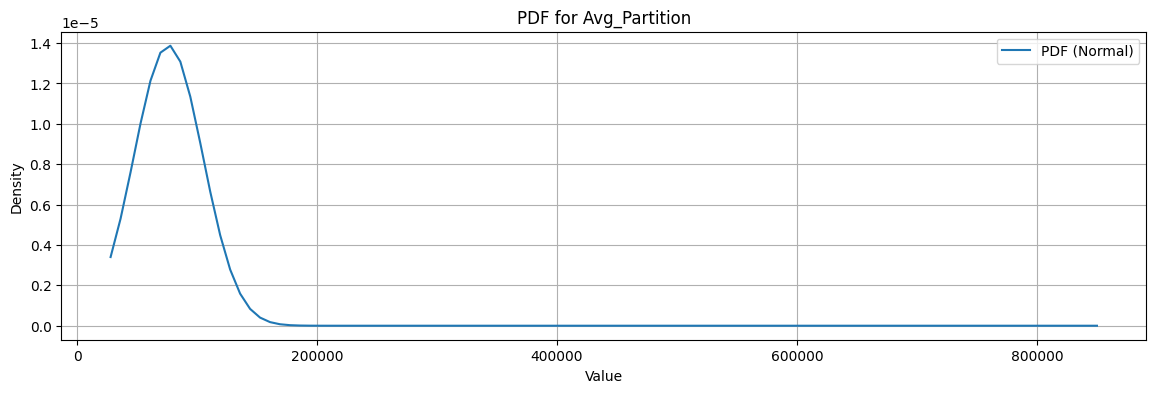

In [23]:
for operator in nexmark_dataset:
    data_arr = nexmark_dataset[operator]['data']
    plot_pdf(data_arr[:1], operator_name=operator)

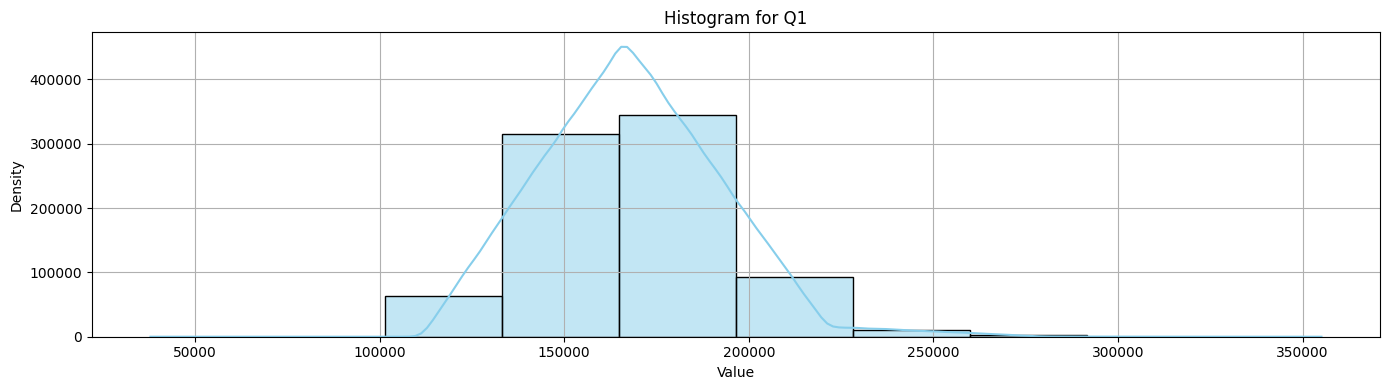

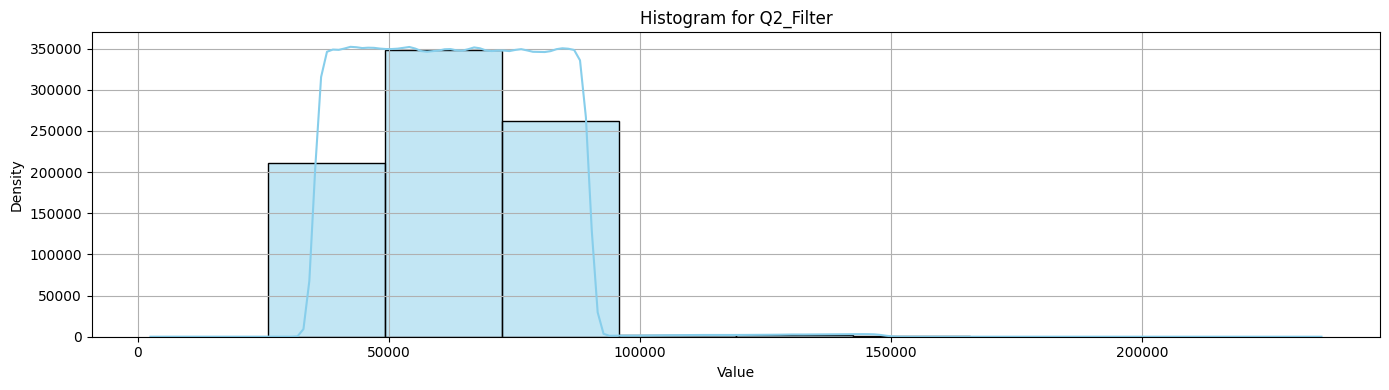

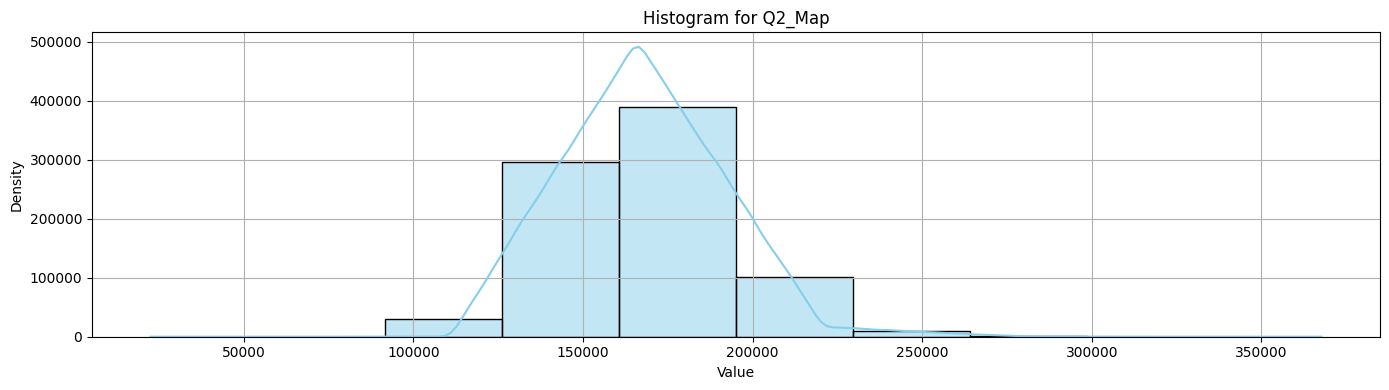

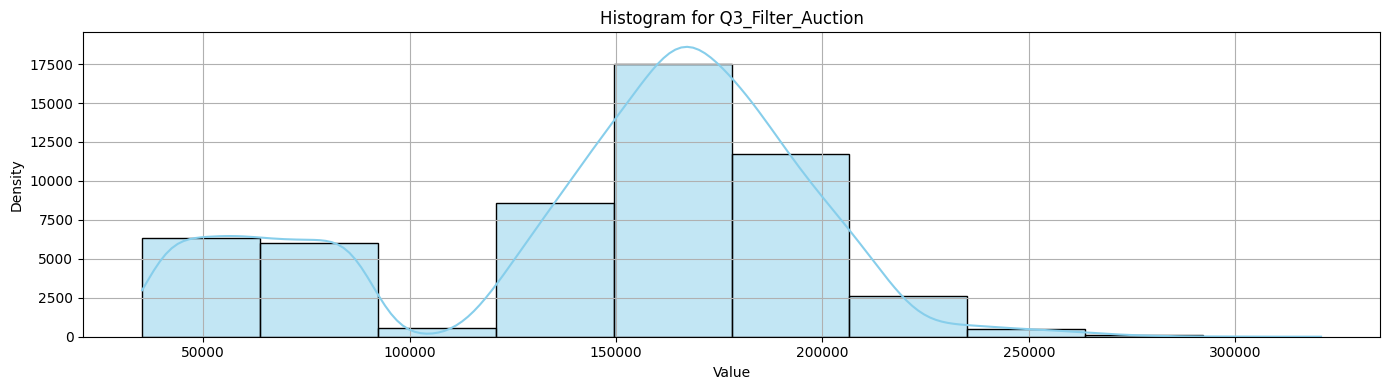

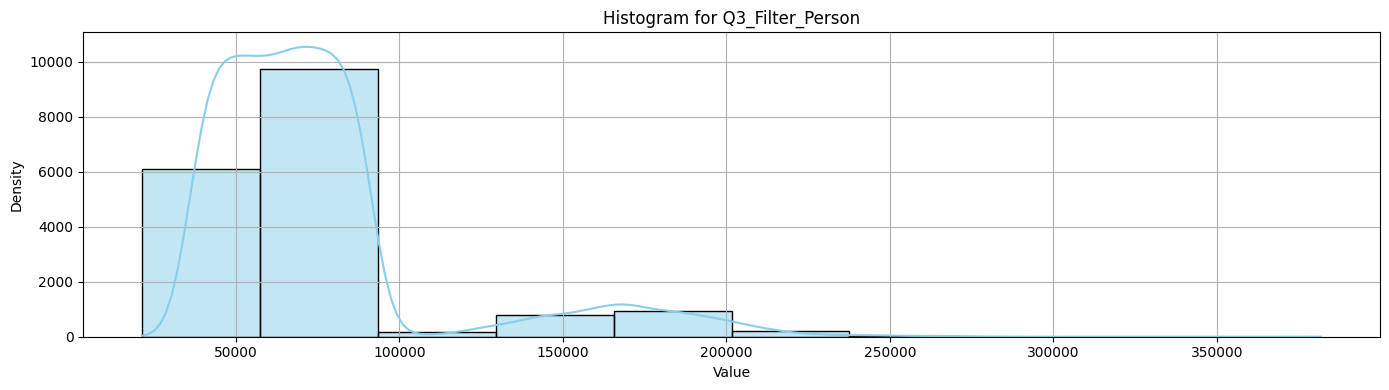

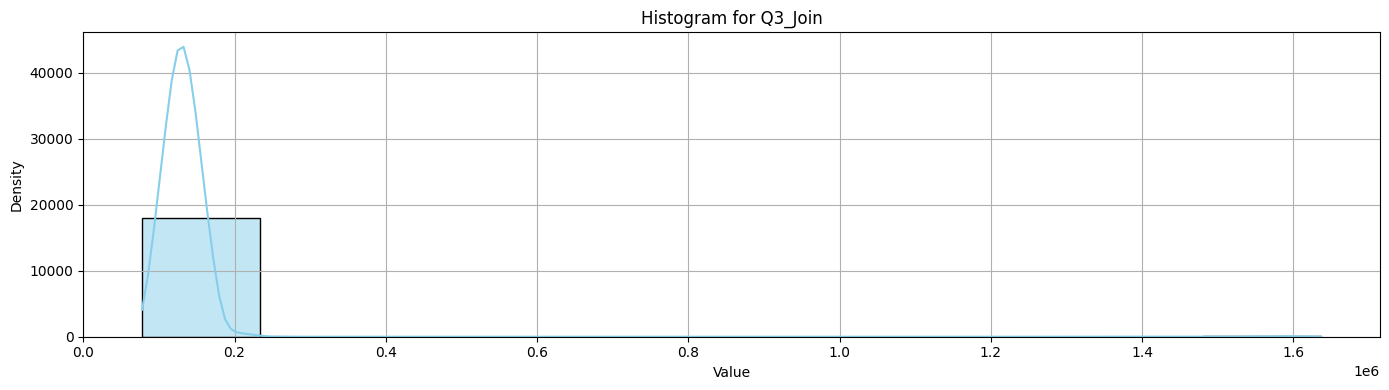

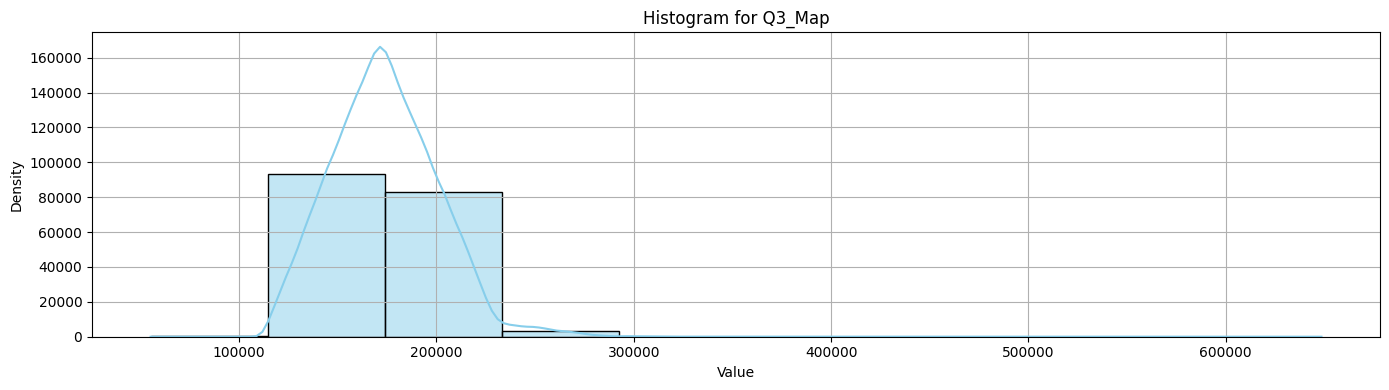

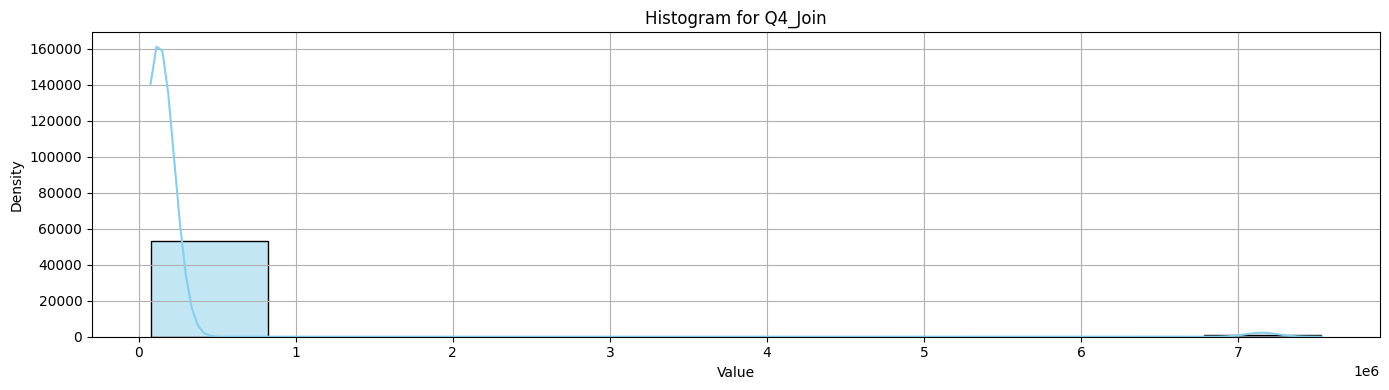

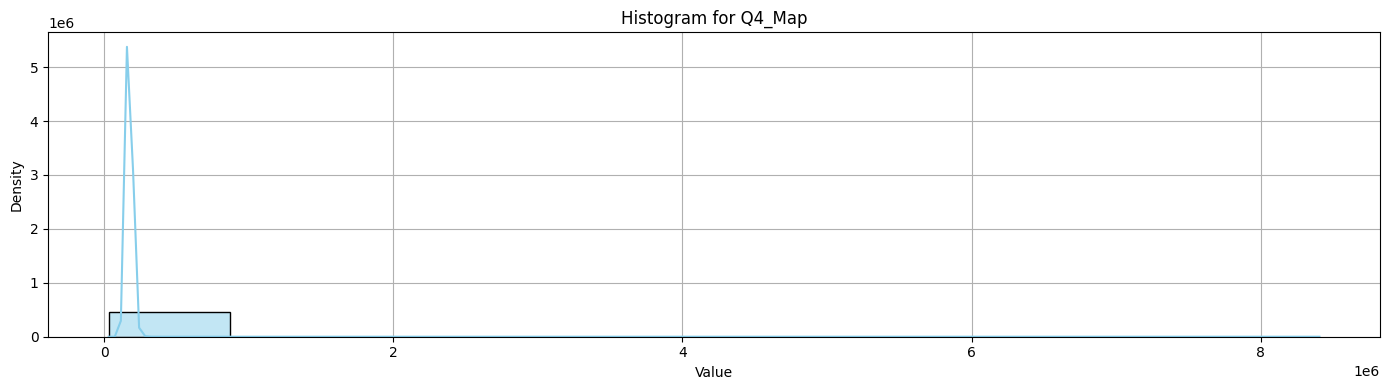

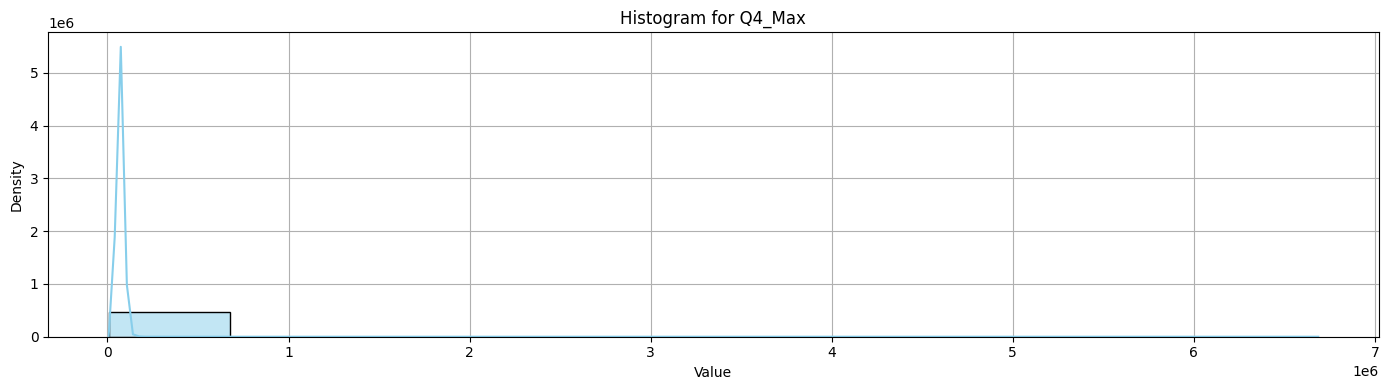

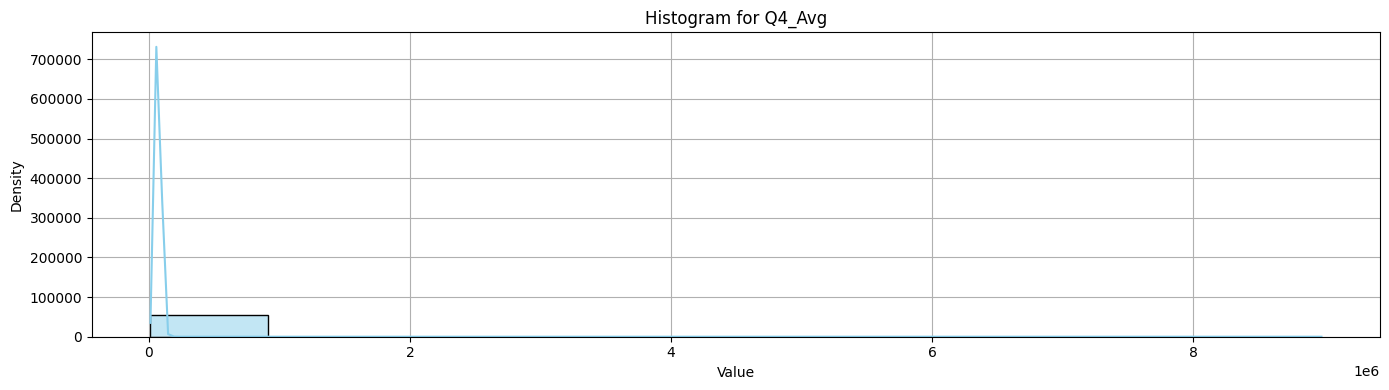

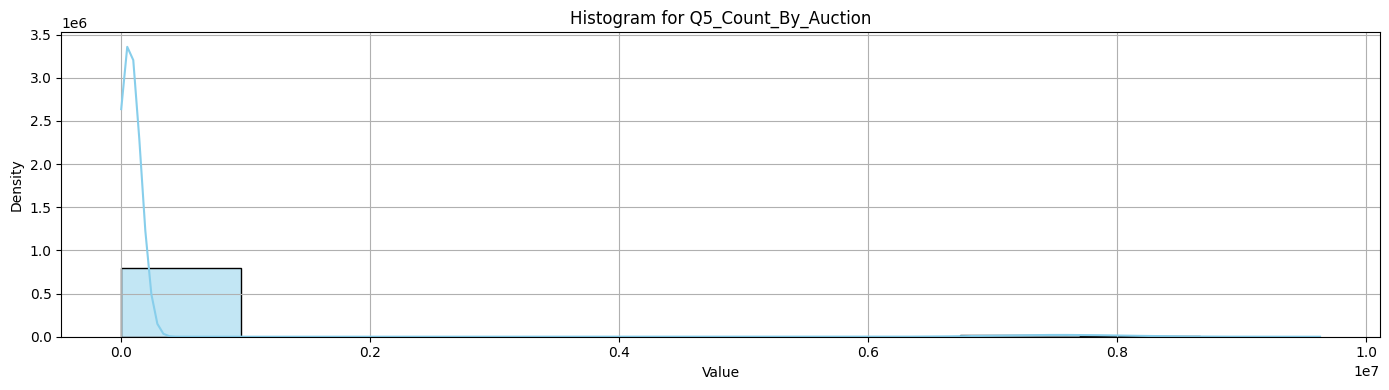

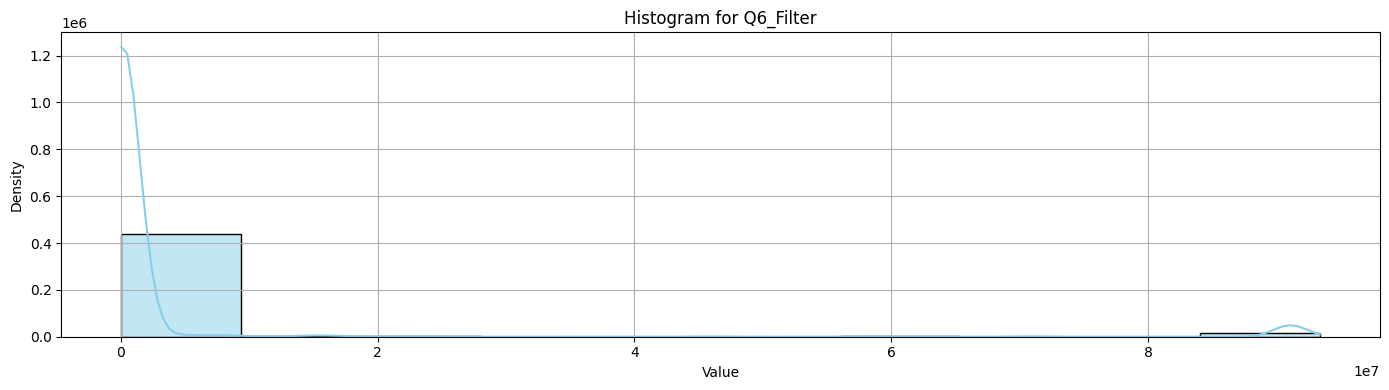

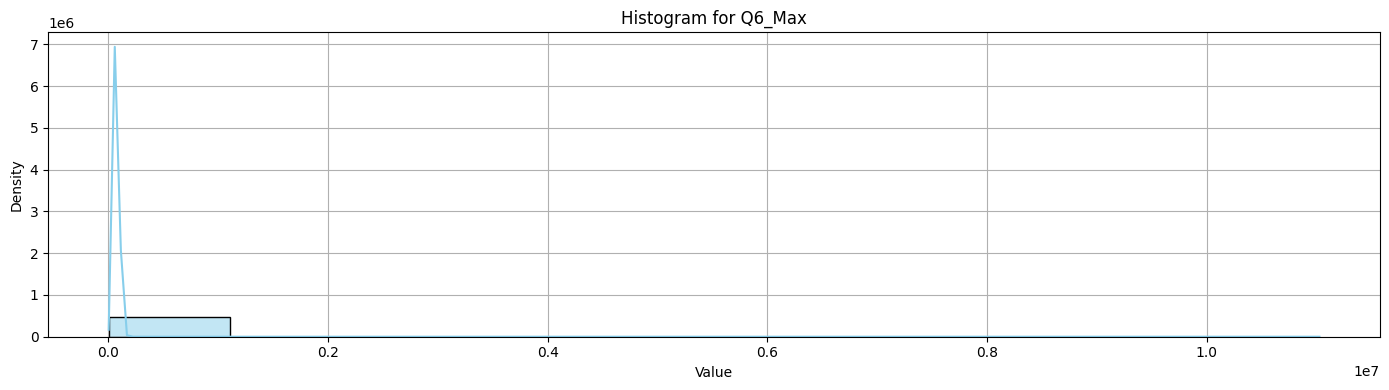

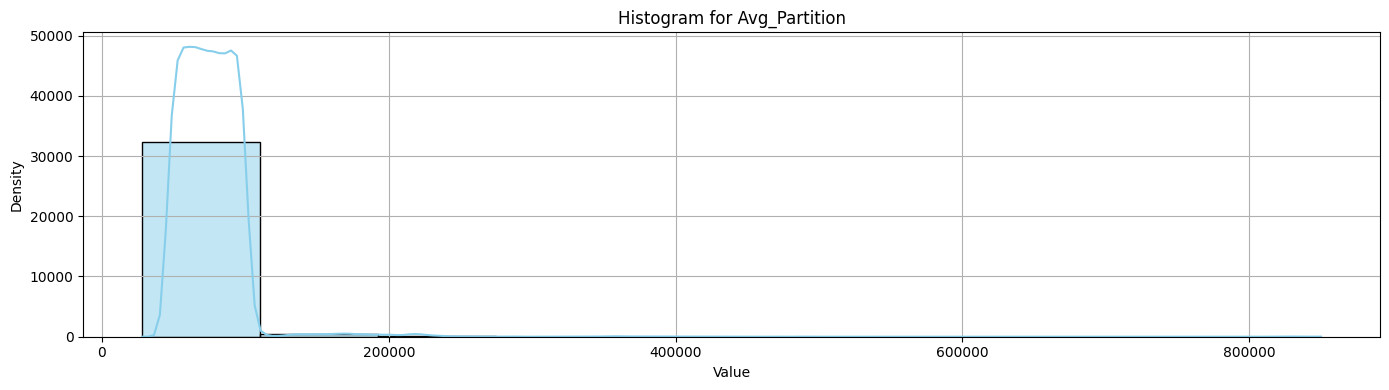

In [18]:
def plot_histogram(data_arr, operator_name=None):
    """Plot the histogram of the data."""
    plt.figure(figsize=(14, 4))

    for data in data_arr:
        # plt.hist(data, bins=50, alpha=0.5, density=True)
        sns.histplot(data, bins=10, kde=True, color='skyblue', edgecolor='black')
        
    if operator_name:
        plt.title(f'Histogram for {operator_name}')
    else:
        plt.title('Histogram')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

for operator in nexmark_dataset:
    data_arr = nexmark_dataset[operator]['data']
    plot_histogram(data_arr[:1], operator_name=operator)
    # plt.savefig(f"nexmark_{operator}_{i}.png")
    # plt.close()

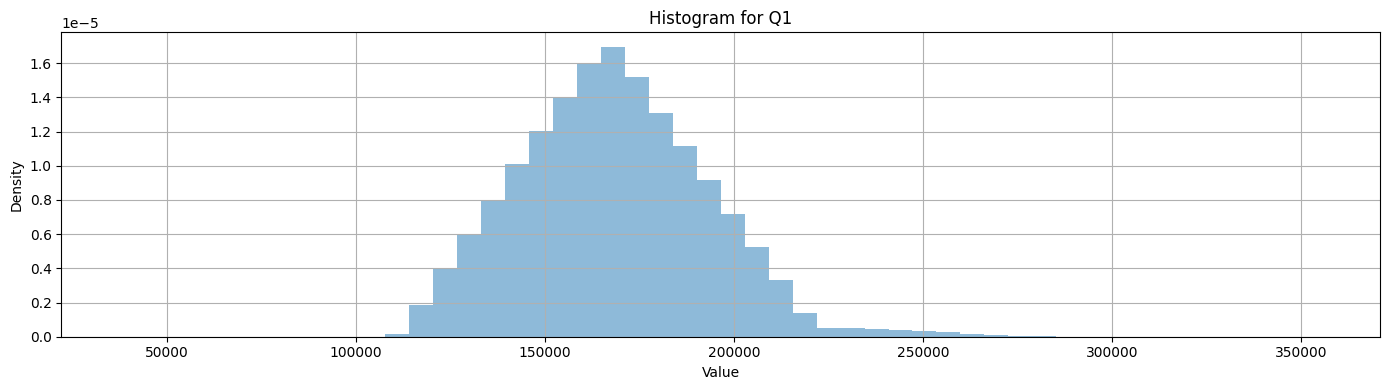

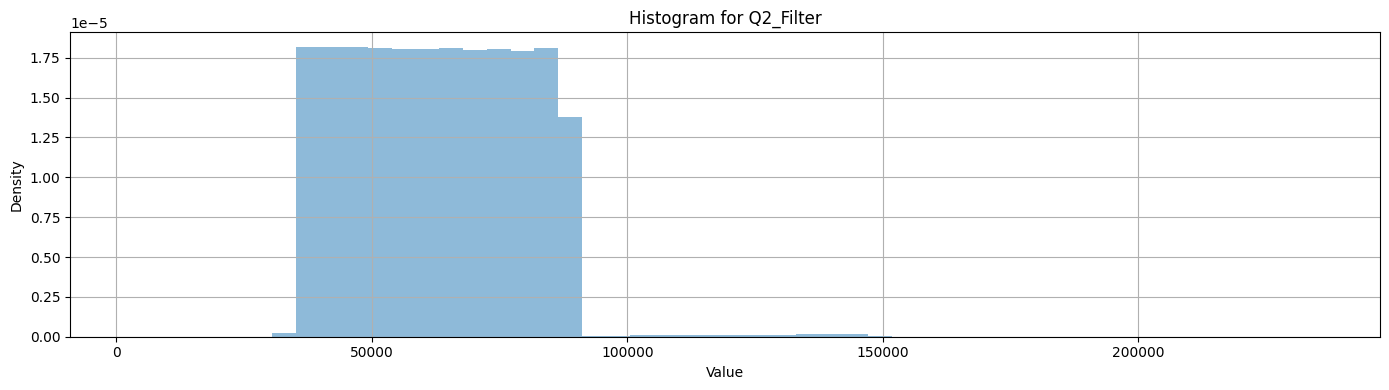

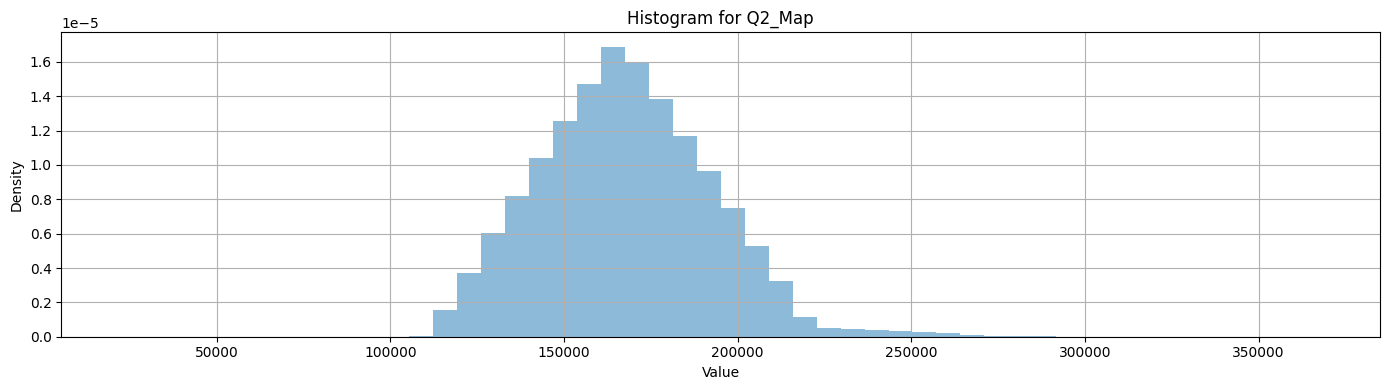

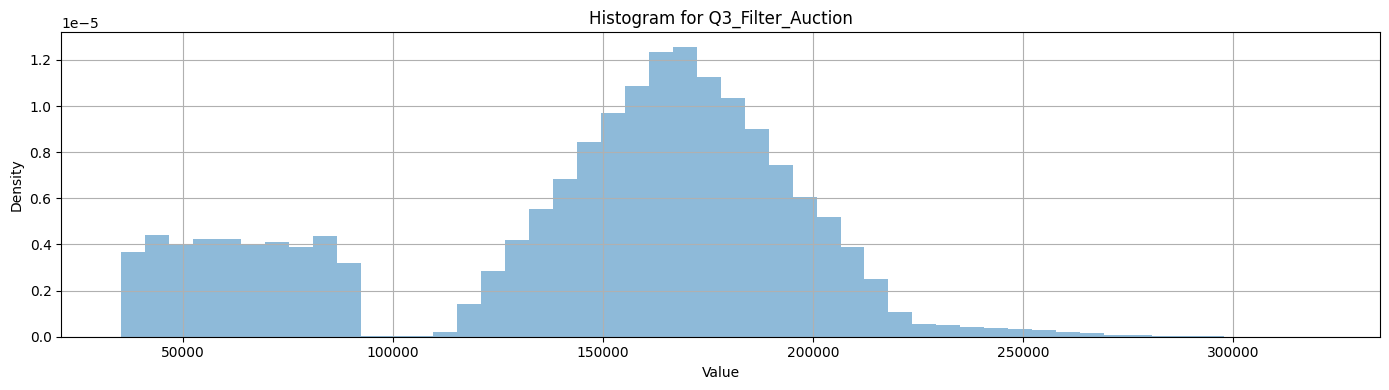

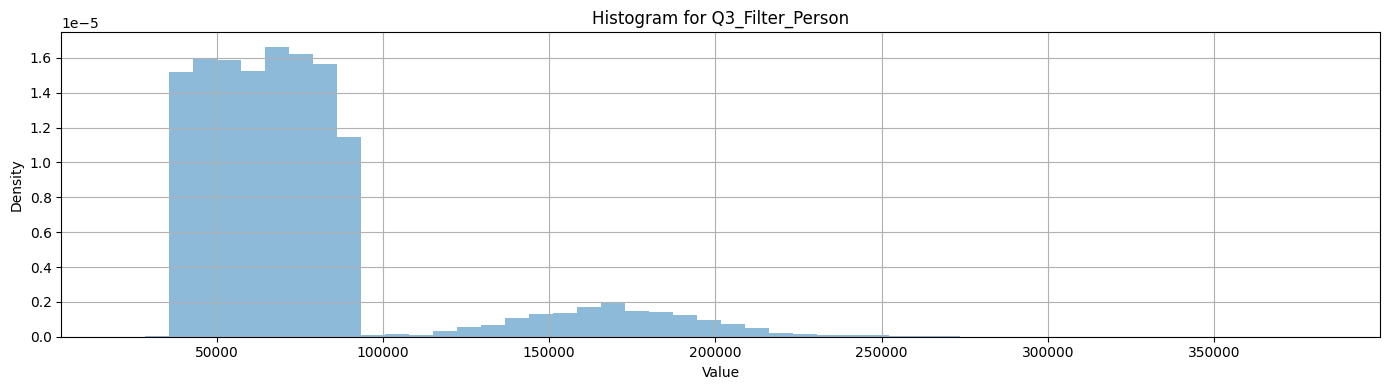

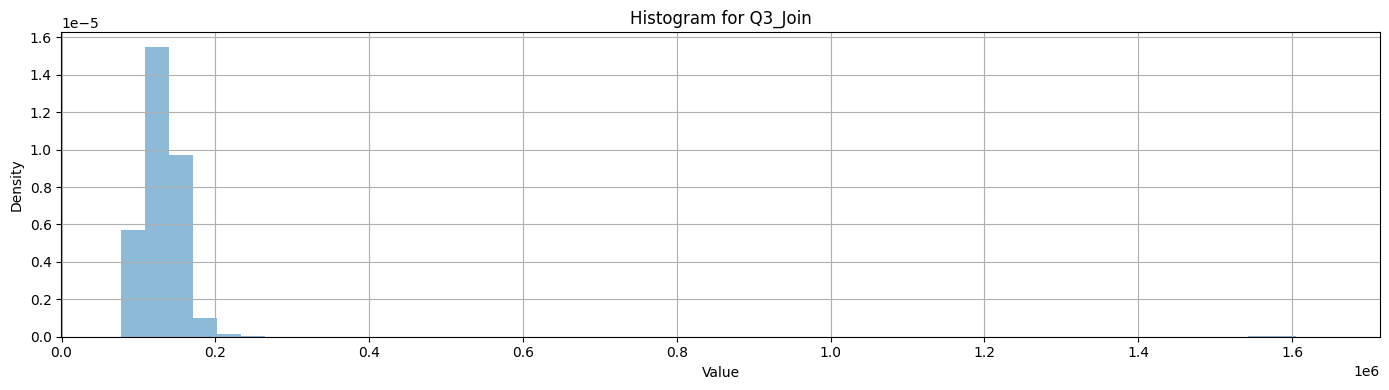

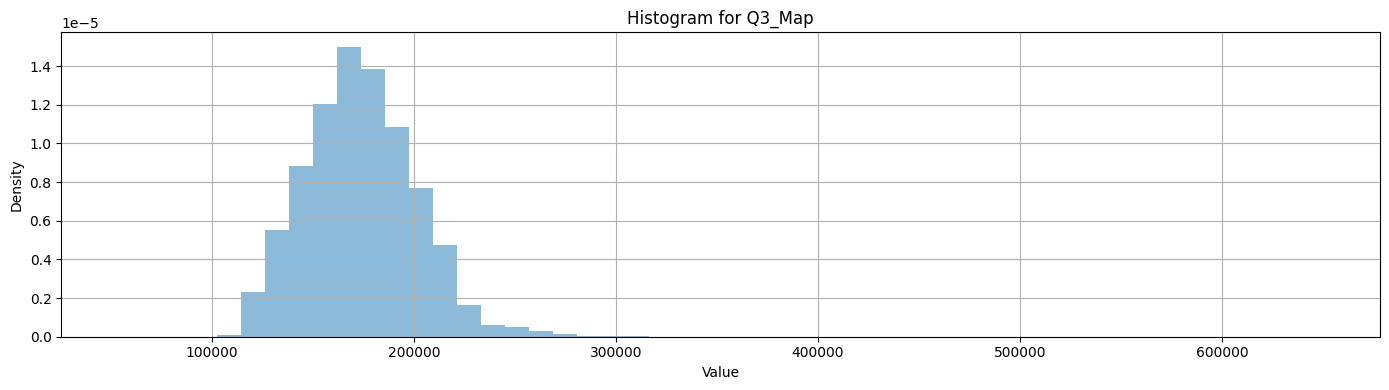

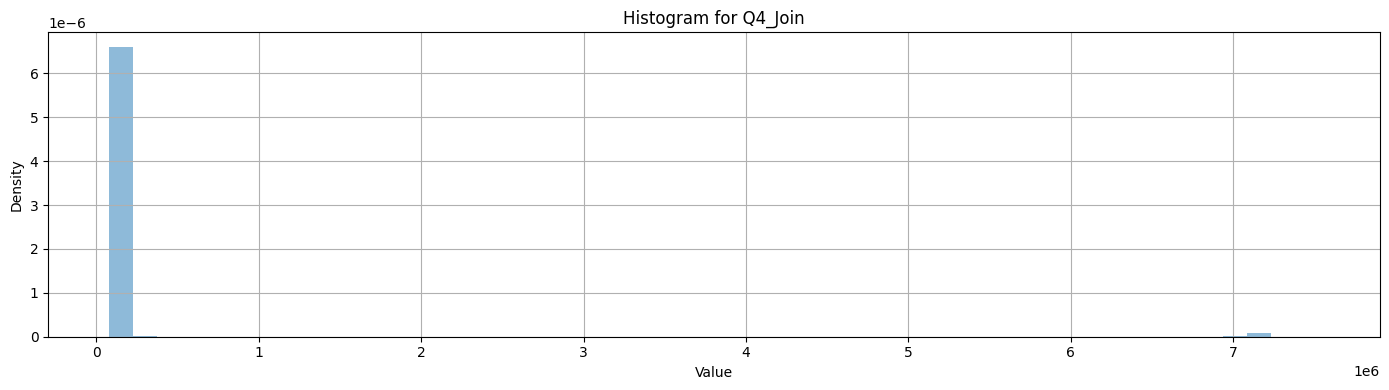

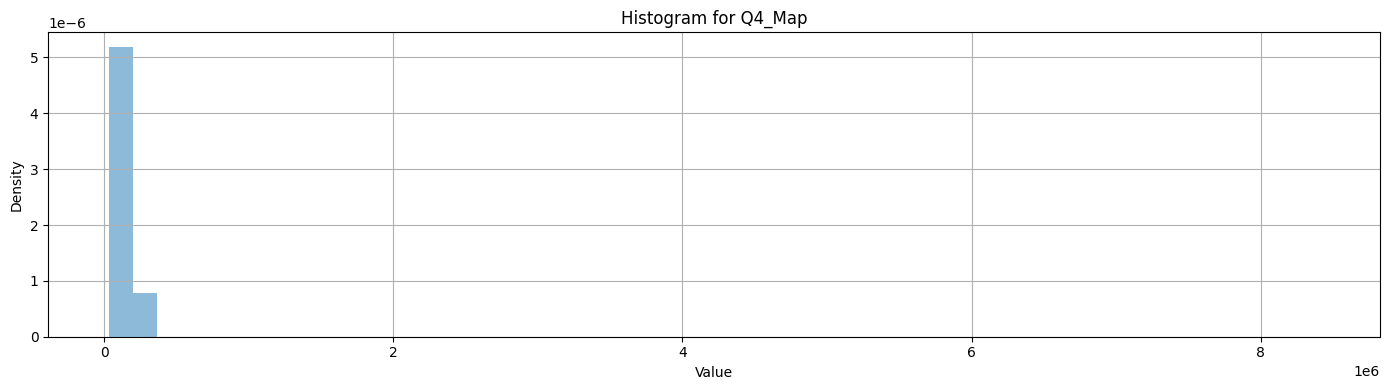

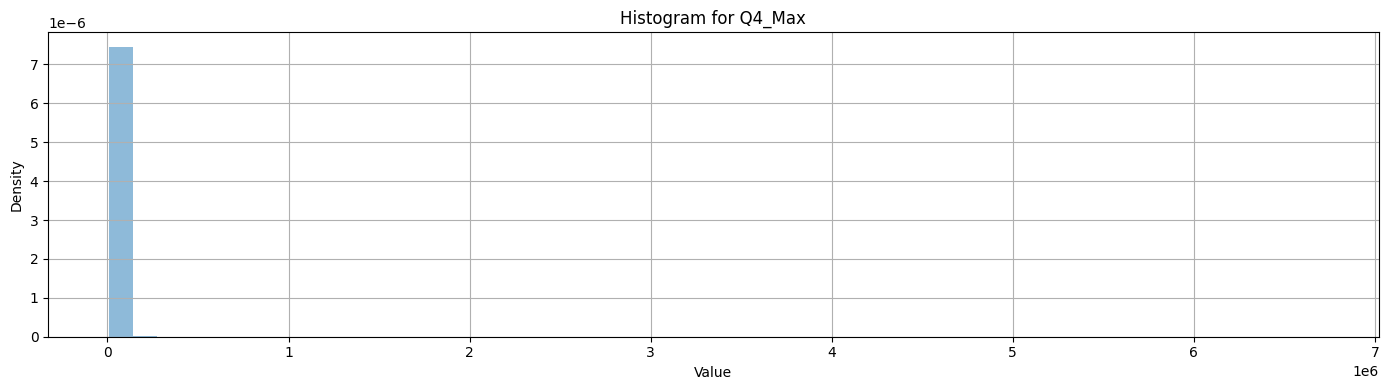

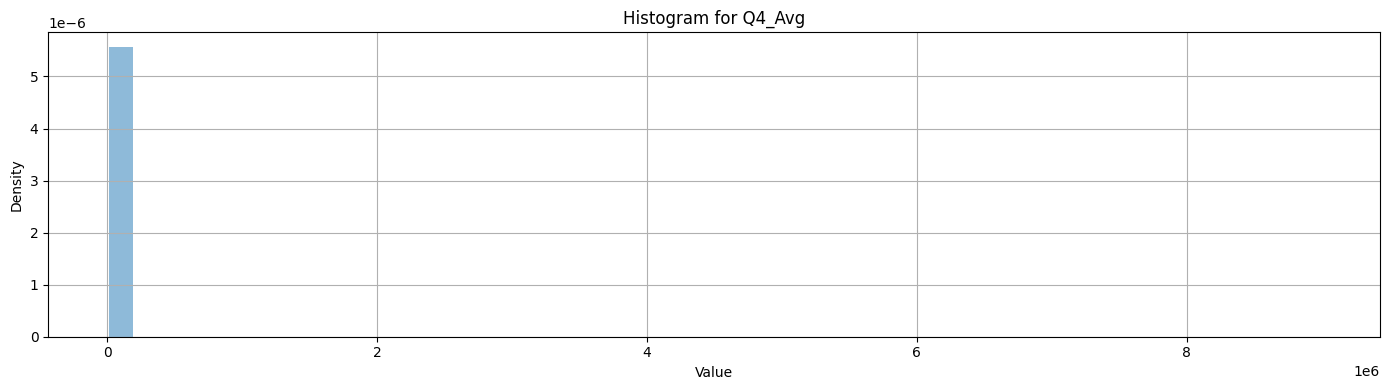

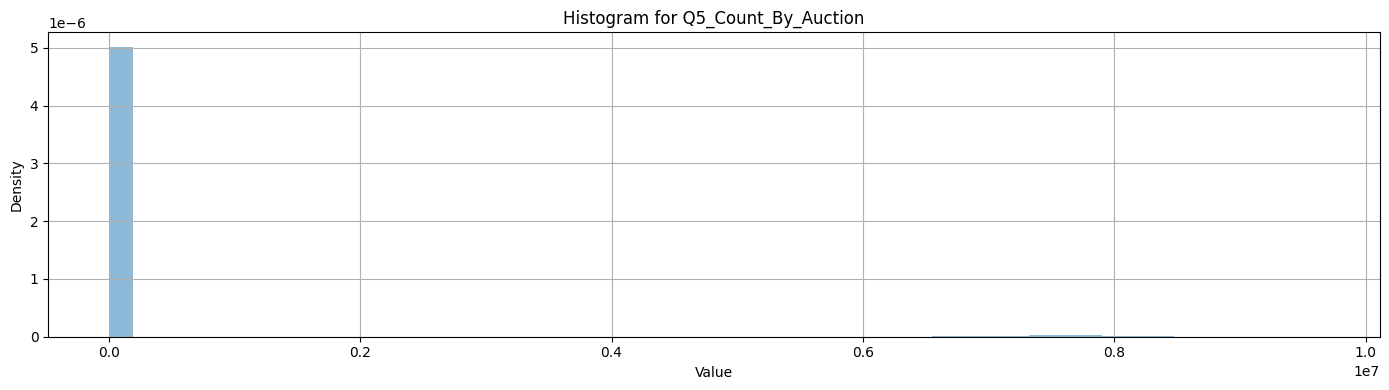

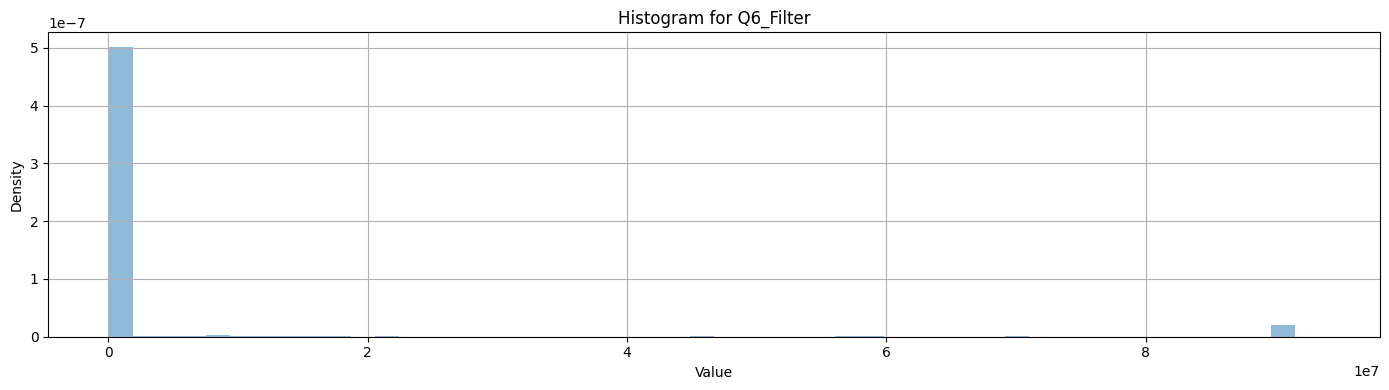

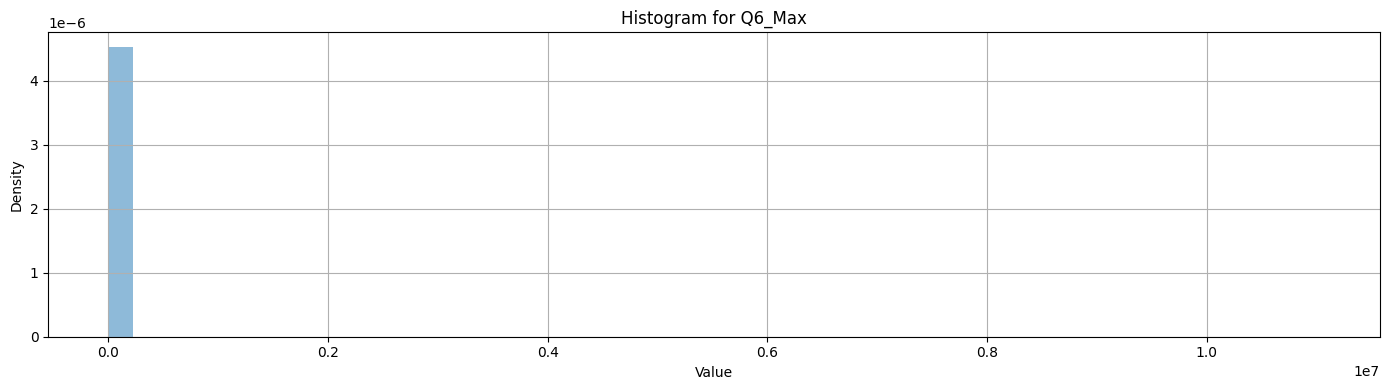

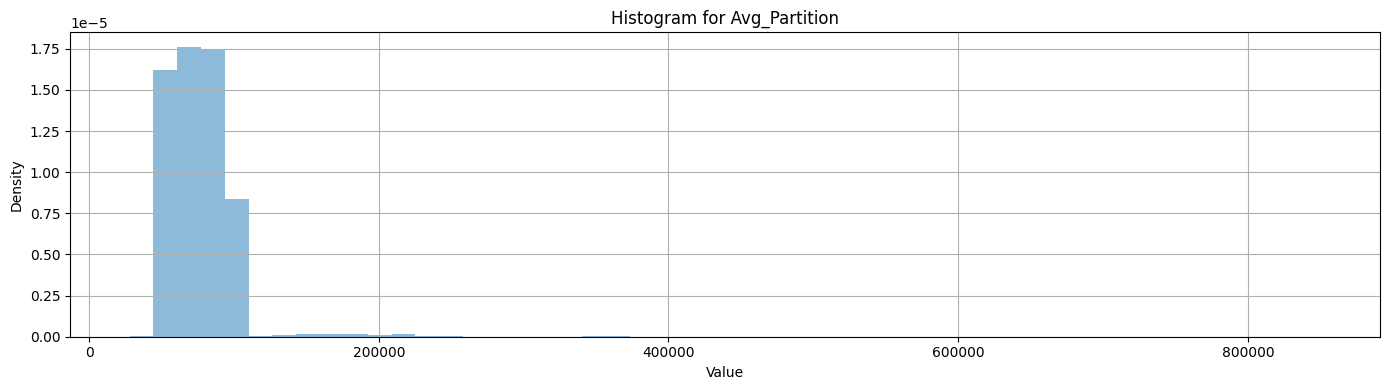

In [11]:
def plot_histogram(data_arr, operator_name=None):
    """Plot the histogram of the data."""
    plt.figure(figsize=(14, 4))

    for data in data_arr:
        plt.hist(data, bins=50, alpha=0.5, density=True)
        
    if operator_name:
        plt.title(f'Histogram for {operator_name}')
    else:
        plt.title('Histogram')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

for operator in nexmark_dataset:
    data_arr = nexmark_dataset[operator]['data']
    plot_histogram(data_arr[:1], operator_name=operator)
    # plt.savefig(f"nexmark_{operator}_{i}.png")
    # plt.close()

In [24]:
secure_sgx_dataset = load_dataset.load_secure_sgx_data(is_split=False)

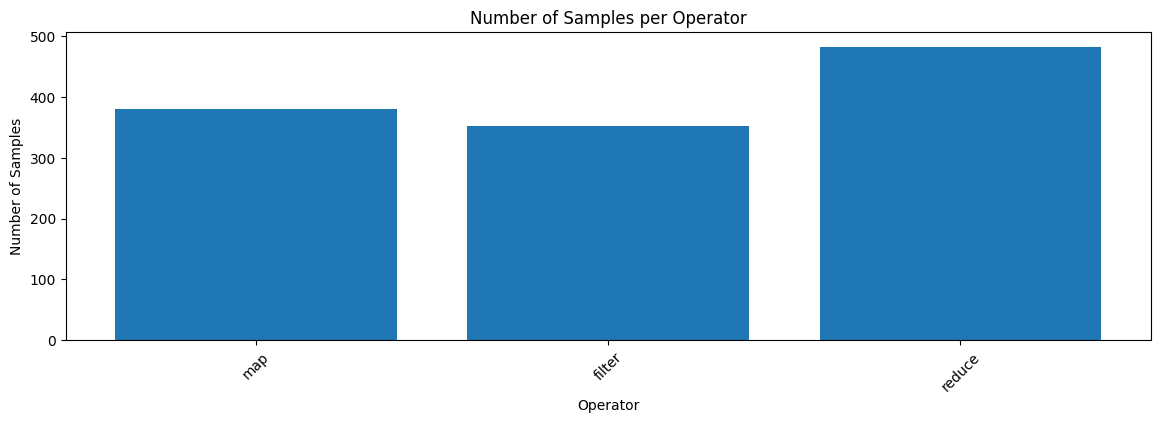

{'map': 380, 'filter': 352, 'reduce': 483}


In [26]:
# Count the number of samples per operator
operator_counts = {operator: len(secure_sgx_dataset[operator]['files']) for operator in secure_sgx_dataset}

# Plot the data
plt.figure(figsize=(14, 4))
plt.bar(operator_counts.keys(), operator_counts.values())
plt.xlabel('Operator')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Operator')
plt.xticks(rotation=45)
plt.show()

print(operator_counts)

In [28]:
for operator in secure_sgx_dataset:
    files = secure_sgx_dataset[operator]['files']
    chosen_files, data_arr = load_files(files, num_samples=50, random_sample=True)
    secure_sgx_dataset[operator]['chosen_files'] = chosen_files
    secure_sgx_dataset[operator]['data'] = data_arr
    print(f"Operator: {operator}, Shape: {len(data_arr)}")

Operator: map, Shape: 50
Operator: filter, Shape: 50
Operator: reduce, Shape: 50


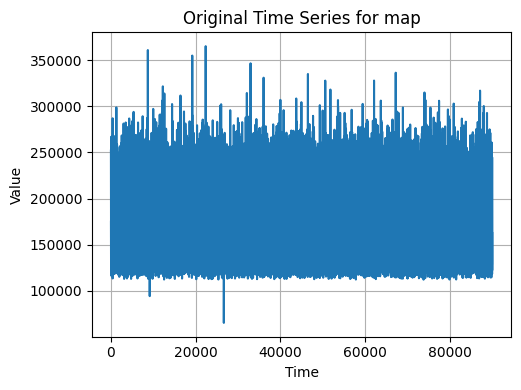

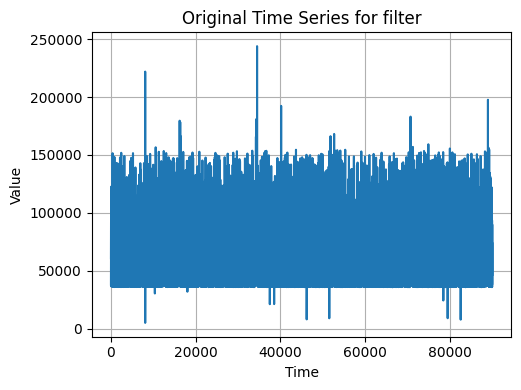

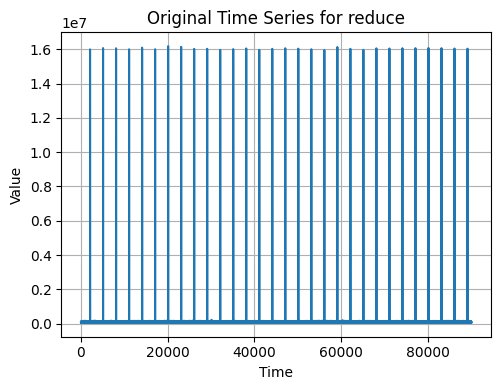

In [29]:
for operator in secure_sgx_dataset:
    data_arr = secure_sgx_dataset[operator]['data']
    random_index = np.random.randint(0, len(data_arr))
    data = data_arr[random_index]
    plot_original_data(data, operator_name=operator)
    # plt.savefig(f"nexmark_{operator}_{i}.png")
    # plt.close()

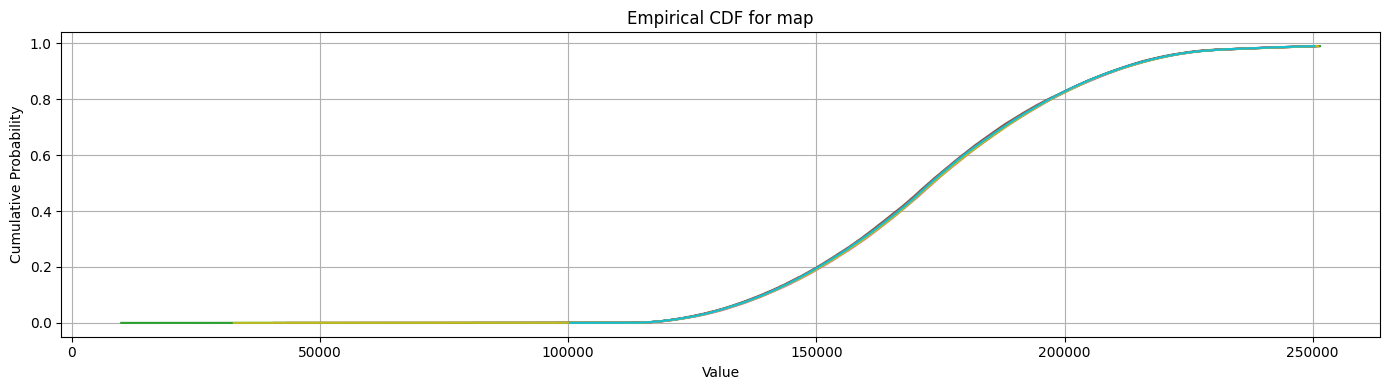

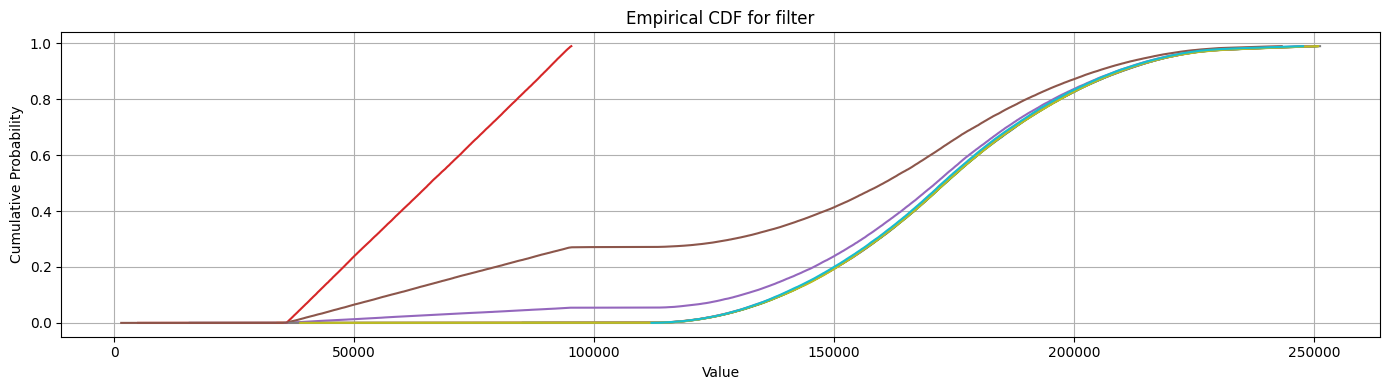

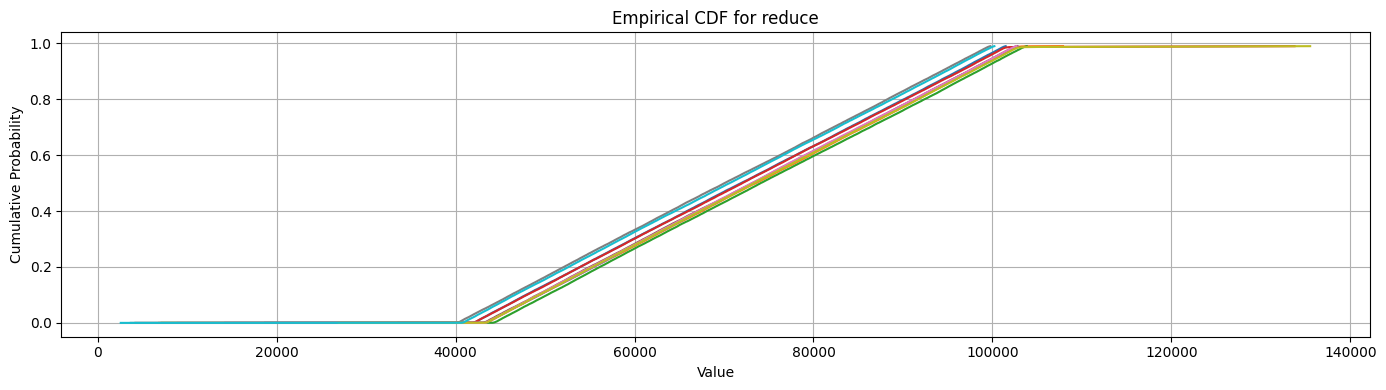

In [30]:
for operator in secure_sgx_dataset:
    data_arr = secure_sgx_dataset[operator]['data']
    plot_empirical_cdf(data_arr[:10], operator_name=operator)
    # break

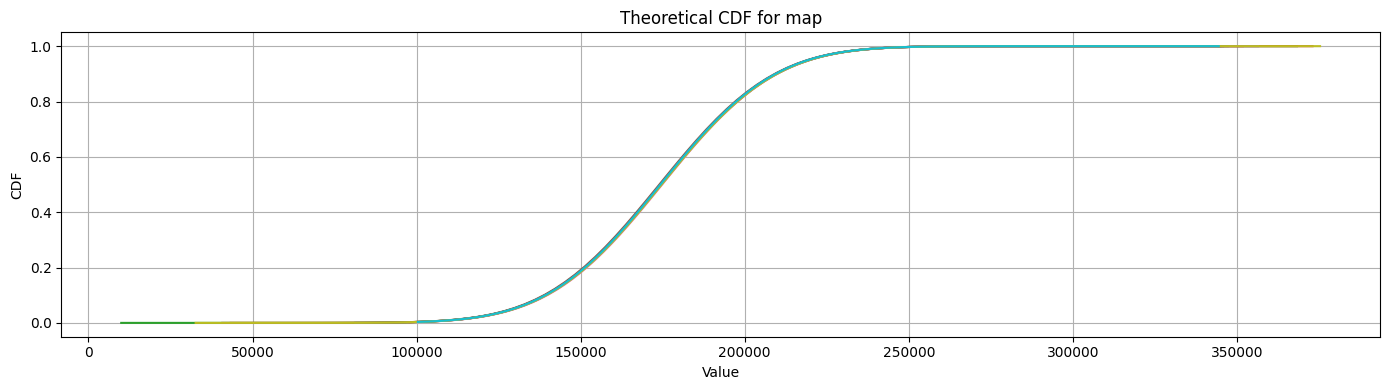

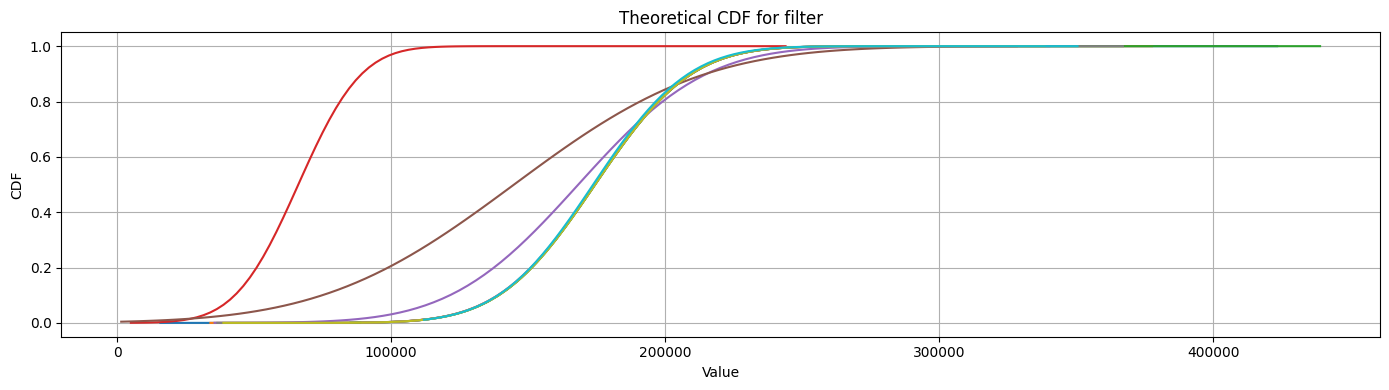

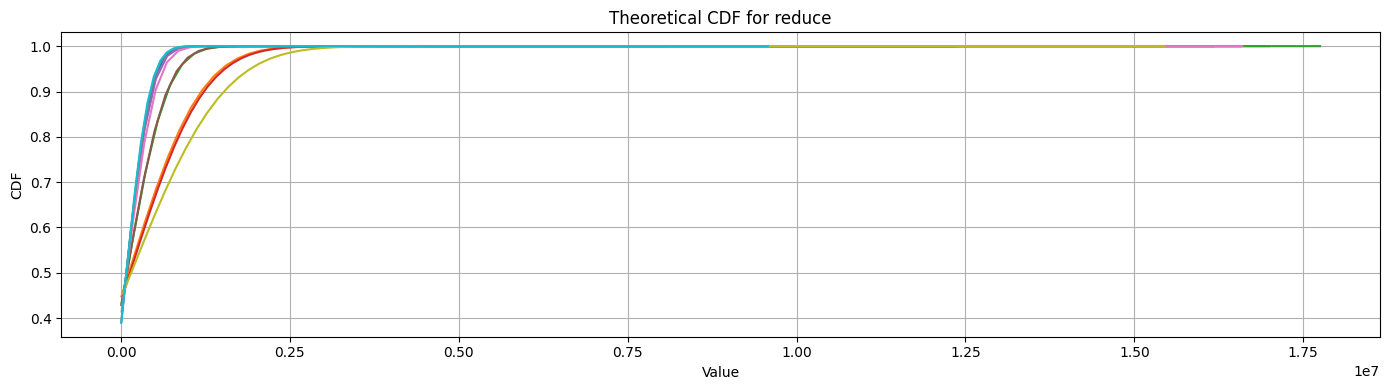

In [31]:
for operator in secure_sgx_dataset:
    data_arr = secure_sgx_dataset[operator]['data']
    plot_cdf(data_arr[:10], operator_name=operator)
    # break

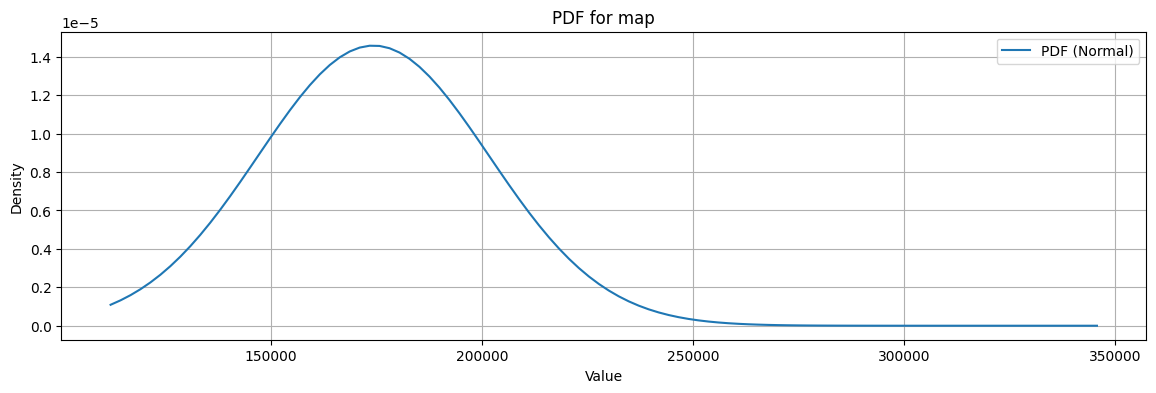

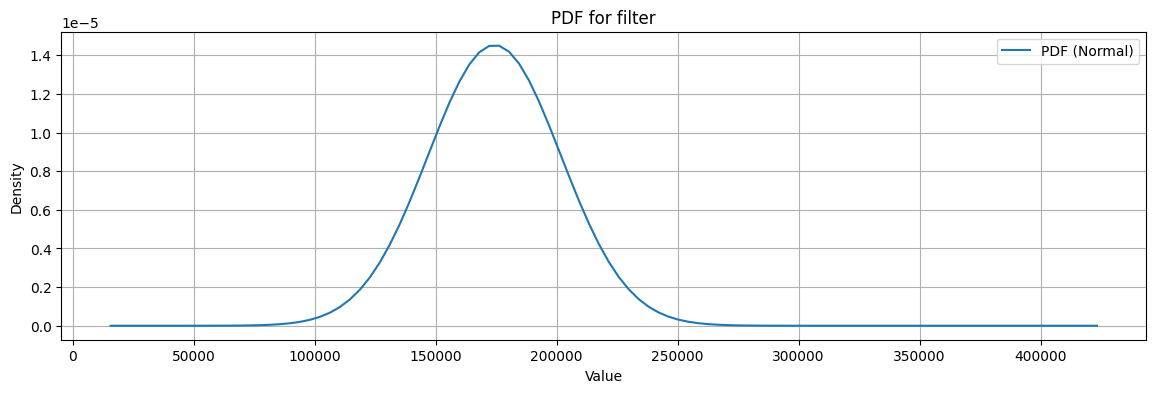

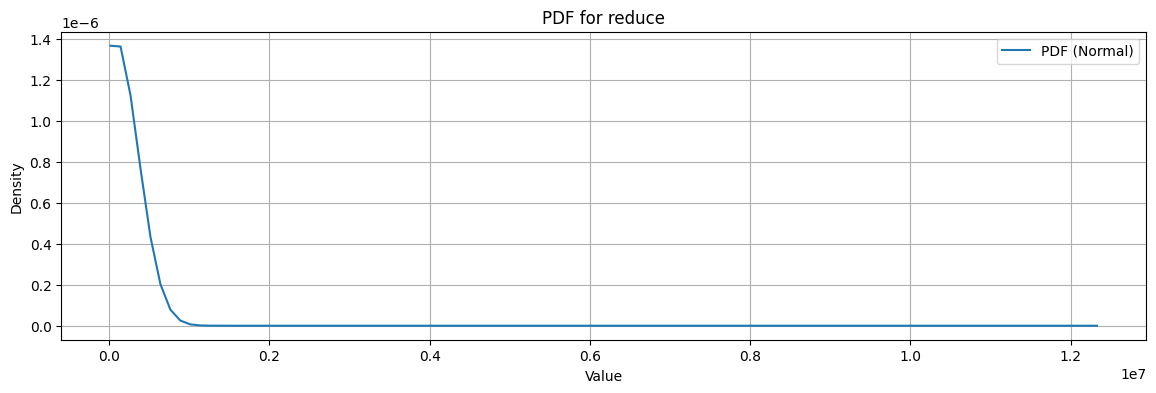

In [32]:
for operator in secure_sgx_dataset:
    data_arr = secure_sgx_dataset[operator]['data']
    plot_pdf(data_arr[:1], operator_name=operator)

In [ ]:
def plot_boxplot(data_arr, operator_name=None):
    """Plot the boxplot of the data."""
    plt.figure(figsize=(14, 4))

    plt.boxplot(data_arr, vert=False)
    
    if operator_name:
        plt.title(f'Boxplot for {operator_name}')
    else:
        plt.title('Boxplot')
    plt.xlabel('Value')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
for operator in nexmark_dataset:
    data_arr = nexmark_dataset[operator]['data']
    plot_boxplot(data_arr, operator_name=operator)
    # plt.savefig(f"nexmark_{operator}_{i}.png")
    # plt.close()
def plot_qq(data_arr, operator_name=None):
    """Plot the Q-Q plot of the data."""
    plt.figure(figsize=(14, 4))

    for data in data_arr:
        sorted_data = np.sort(data)
        quantiles = np.linspace(0, 1, len(sorted_data))
        theoretical_quantiles = np.percentile(sorted_data, quantiles * 100)
        
        plt.plot(theoretical_quantiles, sorted_data, marker='.', linestyle='none')
        
    if operator_name:
        plt.title(f'Q-Q Plot for {operator_name}')
    else:
        plt.title('Q-Q Plot')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
for operator in nexmark_dataset:
    data_arr = nexmark_dataset[operator]['data']
    plot_qq(data_arr, operator_name=operator)
    # plt.savefig(f"nexmark_{operator}_{i}.png")
    # plt.close()
def plot_acf(data_arr, operator_name=None):
    """Plot the ACF of the data."""
    plt.figure(figsize=(14, 4))

    for data in data_arr:
        plt.acorr(data, maxlags=50, label='ACF')
        
    if operator_name:
        plt.title(f'ACF for {operator_name}')
    else:
        plt.title('ACF')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
for operator in nexmark_dataset:
    data_arr = nexmark_dataset[operator]['data']
    plot_acf(data_arr, operator_name=operator)
    # plt.savefig(f"nexmark_{operator}_{i}.png")
    # plt.close()
def plot_pacf(data_arr, operator_name=None):
    """Plot the PACF of the data."""
    plt.figure(figsize=(14, 4))

    for data in data_arr:
        plt.acorr(data, maxlags=50, label='PACF')
        
    if operator_name:
        plt.title(f'PACF for {operator_name}')
    else:
        plt.title('PACF')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
for operator in nexmark_dataset:
    data_arr = nexmark_dataset[operator]['data']
    plot_pacf(data_arr, operator_name=operator)
    # plt.savefig(f"nexmark_{operator}_{i}.png")
    # plt.close()
def plot_rolling_mean(data_arr, operator_name=None):
    """Plot the rolling mean of the data."""
    plt.figure(figsize=(14, 4))

    for data in data_arr:
        rolling_mean = pd.Series(data).rolling(window=50).mean()
        plt.plot(rolling_mean, label='Rolling Mean')
        
    if operator_name:
        plt.title(f'Rolling Mean for {operator_name}')
    else:
        plt.title('Rolling Mean')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
for operator in nexmark_dataset:
    data_arr = nexmark_dataset[operator]['data']
    plot_rolling_mean(data_arr, operator_name=operator)
    # plt.savefig(f"nexmark_{operator}_{i}.png")
    # plt.close()
def plot_rolling_std(data_arr, operator_name=None):
    """Plot the rolling standard deviation of the data."""
    plt.figure(figsize=(14, 4))

    for data in data_arr:
        rolling_std = pd.Series(data).rolling(window=50).std()
        plt.plot(rolling_std, label='Rolling Std')
        
    if operator_name:
        plt.title(f'Rolling Std for {operator_name}')
    else:
        plt.title('Rolling Std')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
for operator in nexmark_dataset:
    data_arr = nexmark_dataset[operator]['data']
    plot_rolling_std(data_arr, operator_name=operator)
    # plt.savefig(f"nexmark_{operator}_{i}.png")
    # plt.close()
def plot_rolling_corr(data_arr, operator_name=None):
    """Plot the rolling correlation of the data."""
    plt.figure(figsize=(14, 4))

    for data in data_arr:
        rolling_corr = pd.Series(data).rolling(window=50).corr(pd.Series(data))
        plt.plot(rolling_corr, label='Rolling Corr')
        
    if operator_name:
        plt.title(f'Rolling Corr for {operator_name}')
    else:
        plt.title('Rolling Corr')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
for operator in nexmark_dataset:
    data_arr = nexmark_dataset[operator]['data']
    plot_rolling_corr(data_arr, operator_name=operator)
    # plt.savefig(f"nexmark_{operator}_{i}.png")
    # plt.close()

In [8]:
nexmark_dataset

{'Q1': {'files': ['tail_0_145_apply_mod_to_all_fields.csv',
   'tail_0_212_xor_price_with_sum_of_shifted_fields.csv',
   'tail_0_9_convert_usd_to_gbp.csv',
   'tail_0_229_adjust_datetime_by_price_factor.csv',
   'tail_0_249_shift_and_or_fields_into_price.csv',
   'tail_0_66_prioritize_odd_bidders.csv',
   'tail_0_52_decrement_bidder.csv',
   'tail_0_220_add_product_of_auction_id_and_price_to_datetime.csv',
   'tail_0_116_reset_large_fields.csv',
   'tail_0_126_sum_all_fields_to_datetime.csv',
   'tail_0_245_toggle_bidder_bits_based_on_price_parity.csv',
   'tail_0_89_assign_bidder_random_group.csv',
   'tail_0_227_reset_bidder_if_prime.csv',
   'tail_0_120_add_all_fields_to_price.csv',
   'tail_0_113_mask_all_fields_with_datetime.csv',
   'tail_0_219_xor_price_with_bitwise_and_of_fields.csv',
   'tail_0_288_multiply_price_by_cyclic_permutation.csv',
   'tail_0_53_reset_bidder.csv',
   'tail_0_230_toggle_price_and_bidder_bits.csv',
   'tail_0_148_scale_fields_by_datetime.csv',
   'tail_